In [2]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('llava_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4          5         6  \
0  3.162146 -0.903273 -1.736204  1.288543  6.582812  -8.629716 -0.022527   
1  4.880323  1.025220 -0.284510  5.588247  3.900945 -11.105122  0.759113   
2  3.341349  5.170041 -4.253198 -2.556113  5.206687  -4.903310  3.145244   
3  4.633794  0.989607  3.441152  1.156447  2.409604  -9.179559 -0.118940   
4  5.374534  2.544695 -5.302870 -4.133938 -0.853640  -7.507550  3.036594   

          7         8         9  ...      4087      4088       4089      4090  \
0 -2.852088  2.878001  0.542700  ... -6.237505  1.750852   7.205899  6.631708   
1 -2.717180  5.075887 -1.579835  ... -9.479925  2.202733  -2.352997  5.044775   
2  0.424181  1.498327 -3.303890  ... -5.666276  2.491357   6.024241 -1.802036   
3 -2.259145  5.621871 -6.830520  ... -6.632195  0.273196  12.989382  4.638300   
4  3.267350  4.360455 -0.806205  ... -7.307005  3.909728   2.109147  4.873223   

        4091      4092      4093      4094      4095    

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [4]:
def knn_classification(dataset,n_neighbors,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Entrenar el modelo de regresión logística
        modelo_knn.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_knn.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_llava_embeddings_val_simple_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/KNN_llava_embeddings_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_knn, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_llava_embeddings_val_cruz_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/KNN_llava_embeddings_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_simple_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.1.png


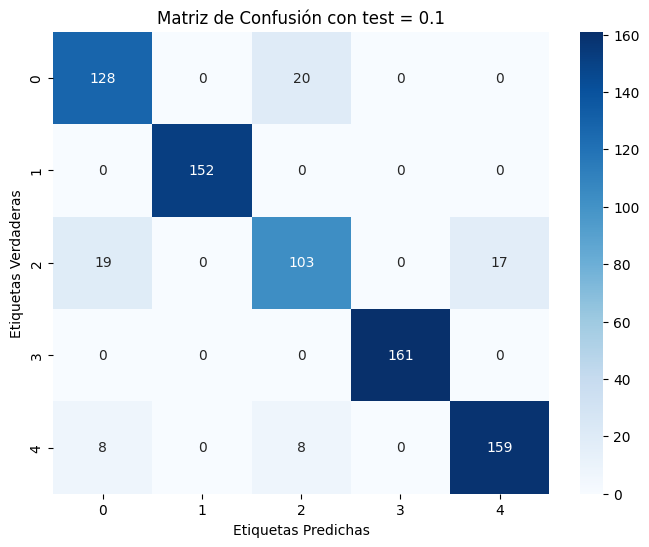

Exactitud del modelo: 0.9070967741935484
Precisión del modelo: 0.9065884155918431
Recall del modelo: 0.9070967741935484
Puntuación F1 del modelo: 0.9066345350829541
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.2.png


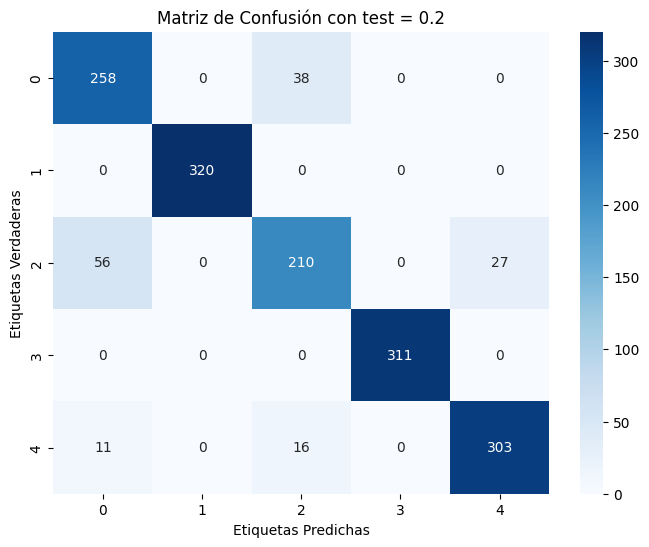

Exactitud del modelo: 0.9045161290322581
Precisión del modelo: 0.904546221520415
Recall del modelo: 0.9045161290322581
Puntuación F1 del modelo: 0.9037969442143274
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.3.png


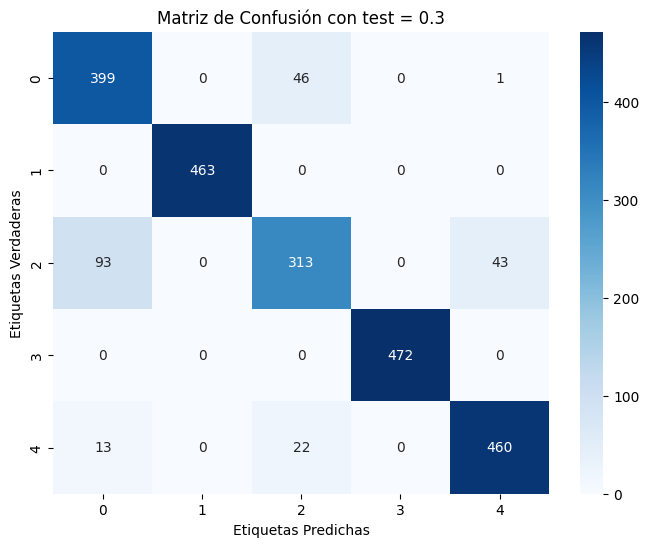

Exactitud del modelo: 0.906236559139785
Precisión del modelo: 0.9066810278545907
Recall del modelo: 0.906236559139785
Puntuación F1 del modelo: 0.9048366822073831
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.4.png


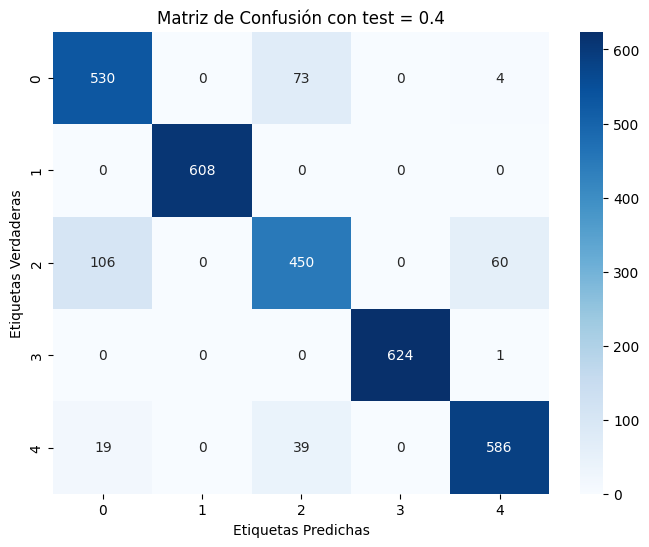

Exactitud del modelo: 0.9025806451612903
Precisión del modelo: 0.9022895691091599
Recall del modelo: 0.9025806451612903
Puntuación F1 del modelo: 0.9018715280220704
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.5.png


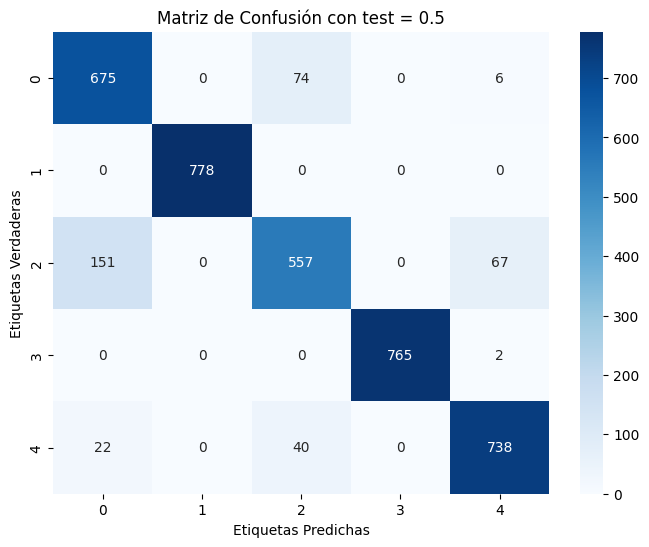

Exactitud del modelo: 0.9065806451612903
Precisión del modelo: 0.907226577762452
Recall del modelo: 0.9065806451612903
Puntuación F1 del modelo: 0.9055356595376286
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.6.png


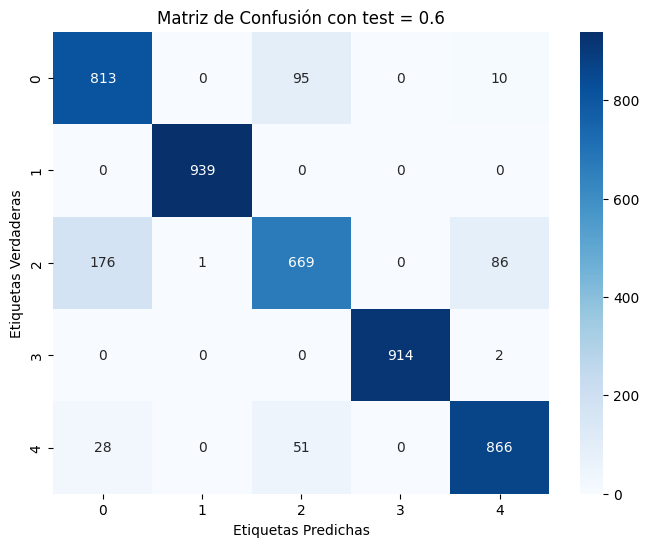

Exactitud del modelo: 0.9034408602150538
Precisión del modelo: 0.9036196767691804
Recall del modelo: 0.9034408602150538
Puntuación F1 del modelo: 0.9023847070660044
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.7.png


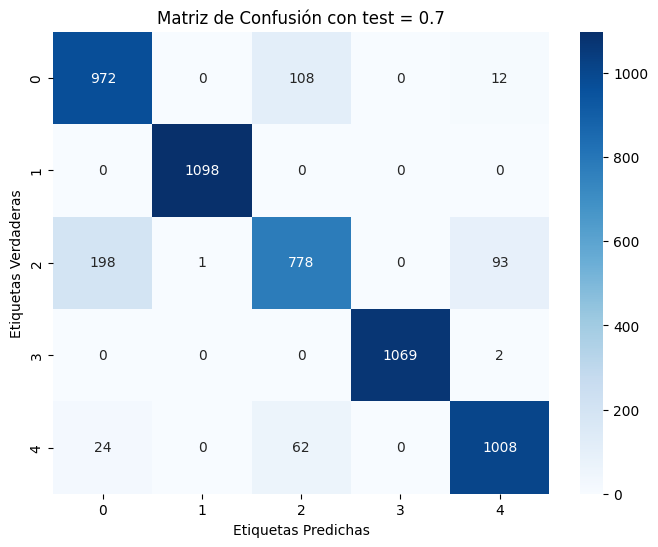

Exactitud del modelo: 0.9078341013824884
Precisión del modelo: 0.907668819086577
Recall del modelo: 0.9078341013824884
Puntuación F1 del modelo: 0.906835260000848
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.8.png


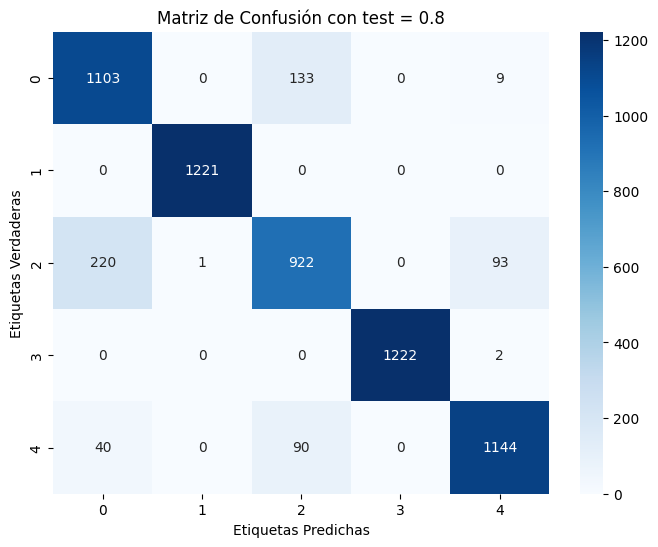

Exactitud del modelo: 0.9051612903225806
Precisión del modelo: 0.905583899758964
Recall del modelo: 0.9051612903225806
Puntuación F1 del modelo: 0.9047783325529942
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.9.png


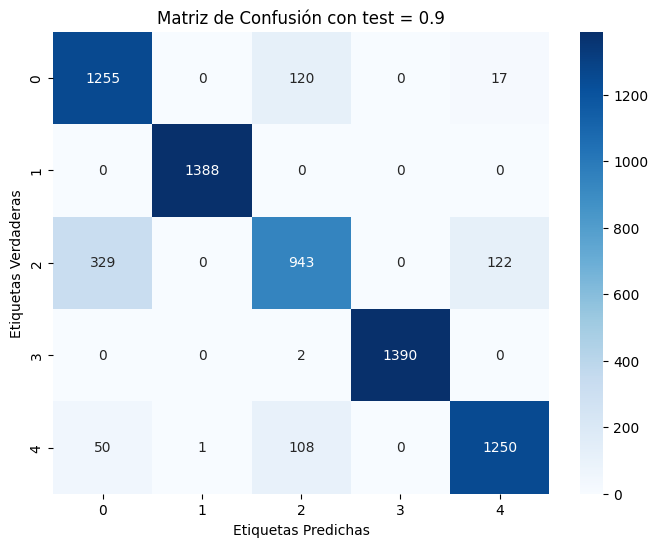

Exactitud del modelo: 0.8926164874551972
Precisión del modelo: 0.8941644320683191
Recall del modelo: 0.8926164874551972
Puntuación F1 del modelo: 0.8912190715783961
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_3_vecinos/KNN_llava_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_cruz_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_2.png


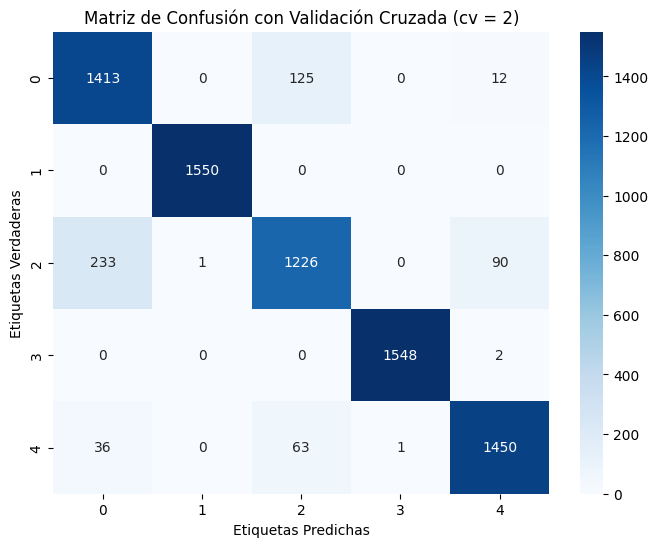

Exactitud media: 0.9273548387096774
Precisión media: 0.927780160167721
Recall media: 0.9273548387096774
Puntuación F1 media: 0.9269258933284402
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_3.png


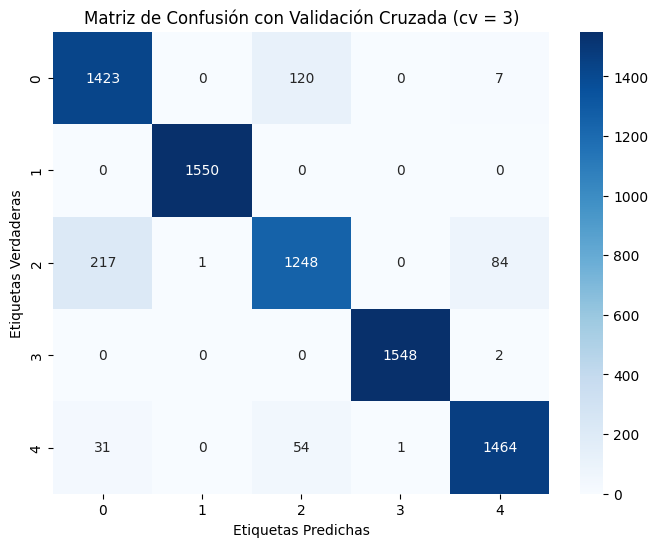

Exactitud media: 0.9332903225806451
Precisión media: 0.9336404867845597
Recall media: 0.9332903225806451
Puntuación F1 media: 0.9329025293143252
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_4.png


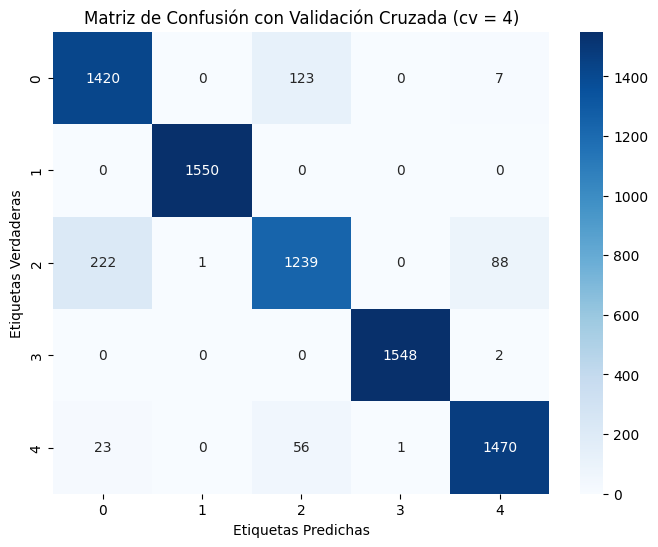

Exactitud media: 0.9325161290322581
Precisión media: 0.9326853348232762
Recall media: 0.9325161290322581
Puntuación F1 media: 0.932037802499299
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_5.png


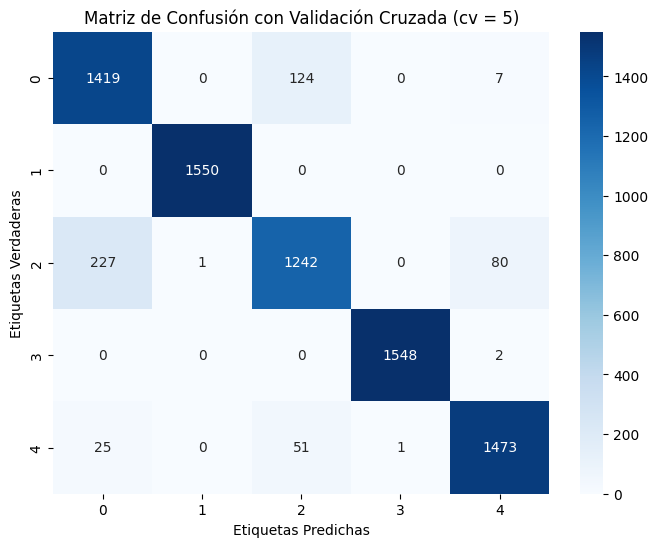

Exactitud media: 0.9331612903225807
Precisión media: 0.9334846383056314
Recall media: 0.9331612903225807
Puntuación F1 media: 0.9327339394989329
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_6.png


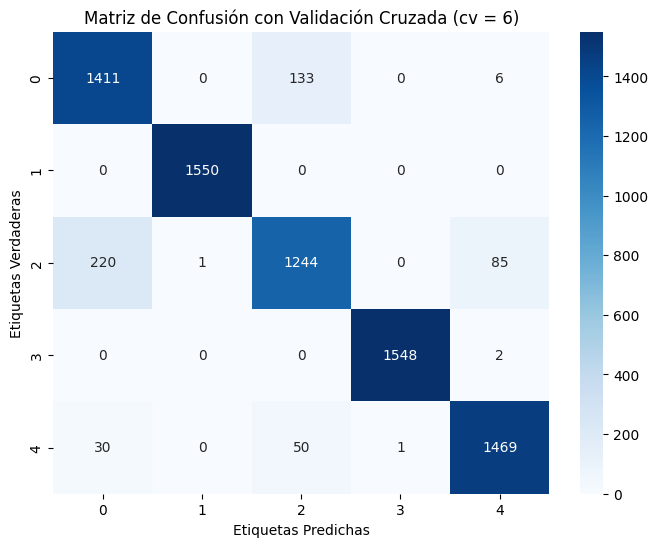

Exactitud media: 0.9318709677419355
Precisión media: 0.9320835638596157
Recall media: 0.9318709677419355
Puntuación F1 media: 0.9314782981771228
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_7.png


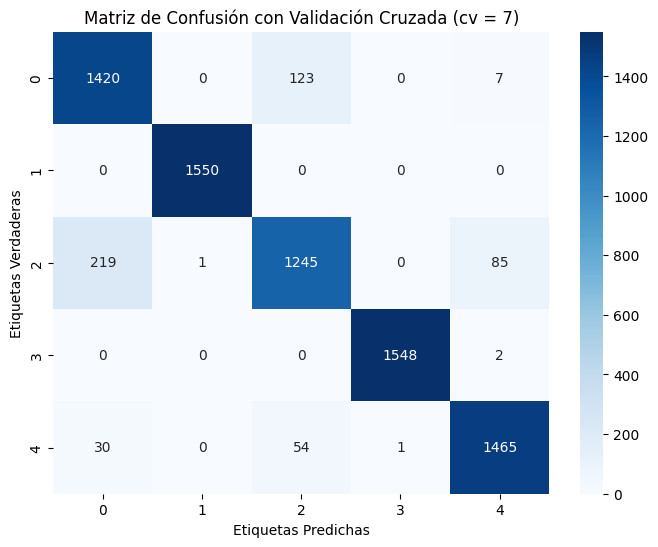

Exactitud media: 0.9326451612903226
Precisión media: 0.9329501819382999
Recall media: 0.9326451612903226
Puntuación F1 media: 0.9322431816528339
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_8.png


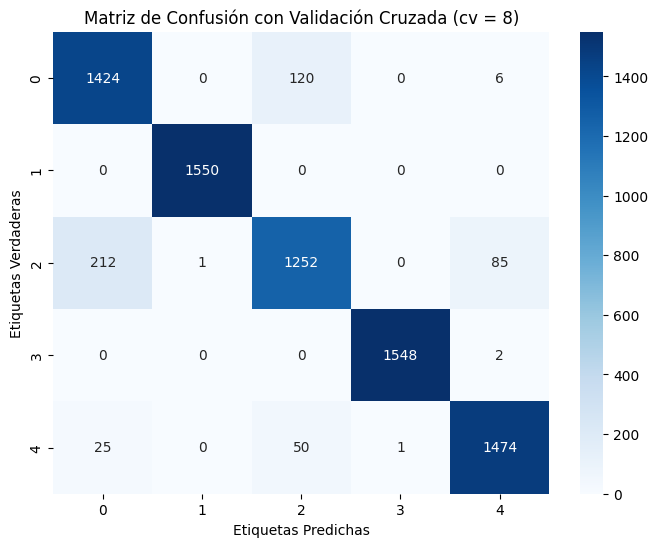

Exactitud media: 0.9352258064516129
Precisión media: 0.9354251086201413
Recall media: 0.9352258064516129
Puntuación F1 media: 0.9347944114505464
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_9.png


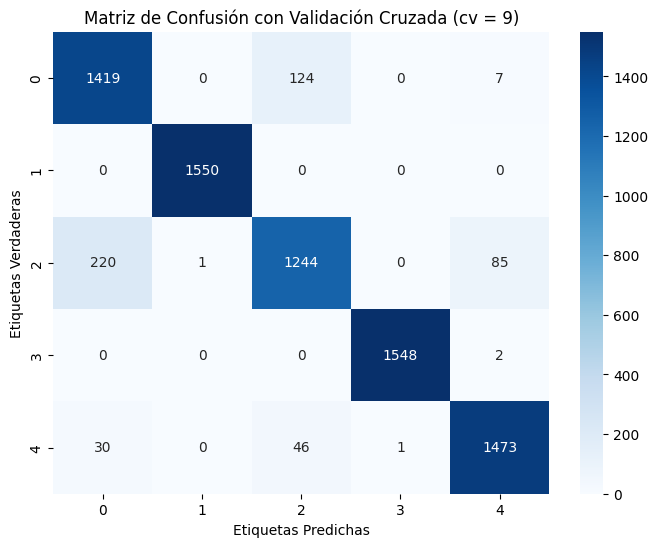

Exactitud media: 0.9334193548387096
Precisión media: 0.9337411676380094
Recall media: 0.9334193548387096
Puntuación F1 media: 0.9329790990425975
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_10.png


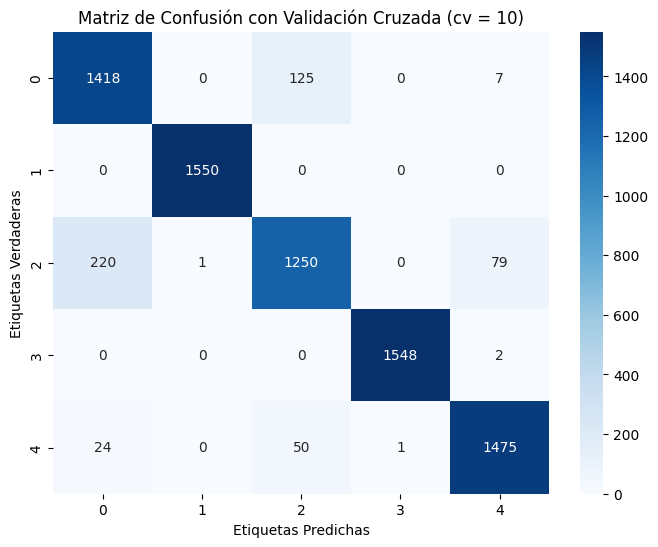

Exactitud media: 0.9343225806451613
Precisión media: 0.93455792099486
Recall media: 0.9343225806451613
Puntuación F1 media: 0.9339247031912696
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_3_vecinos/KNN_llava_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_simple_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.1.png


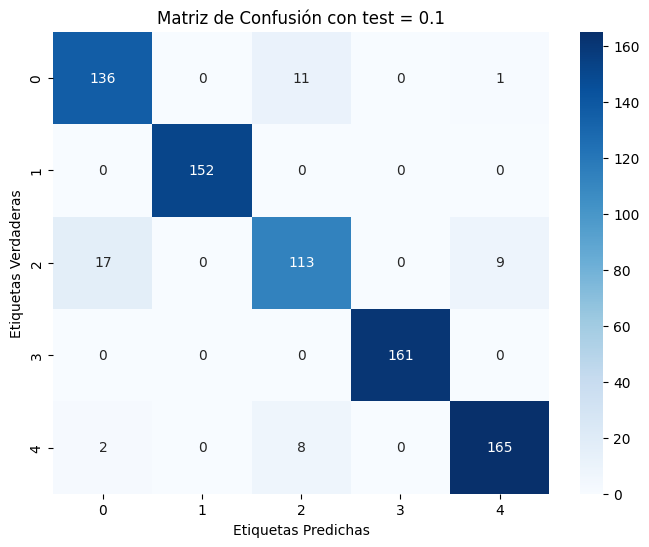

Exactitud del modelo: 0.9380645161290323
Precisión del modelo: 0.9378715983981333
Recall del modelo: 0.9380645161290323
Puntuación F1 del modelo: 0.9377766516087391
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.2.png


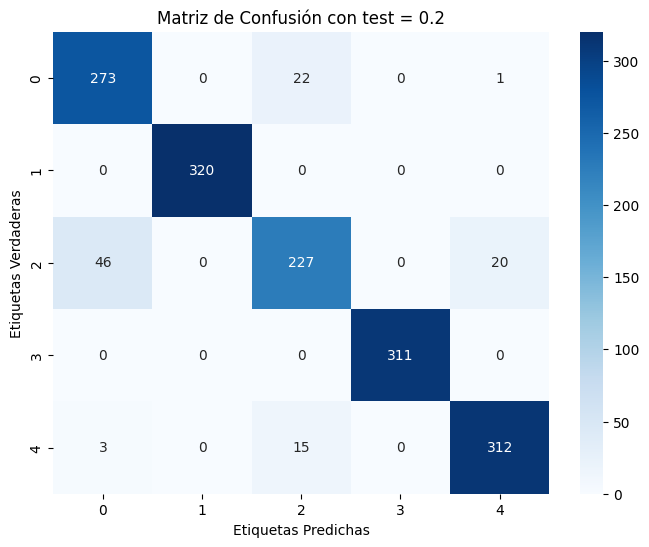

Exactitud del modelo: 0.9309677419354838
Precisión del modelo: 0.9310202045089843
Recall del modelo: 0.9309677419354838
Puntuación F1 del modelo: 0.9302719160355695
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.3.png


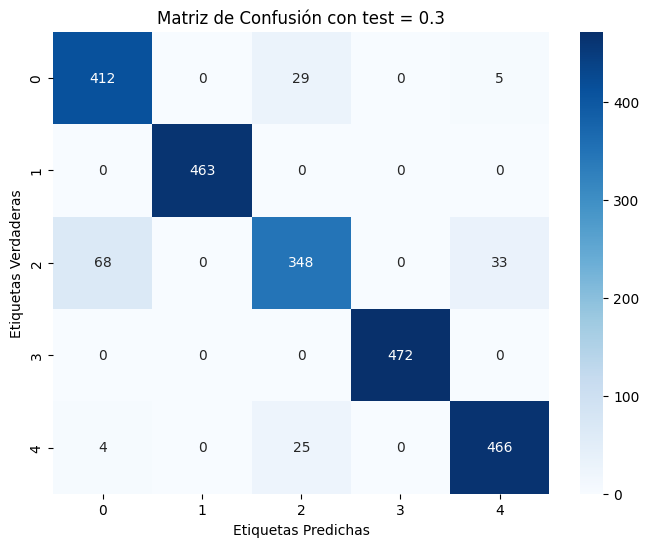

Exactitud del modelo: 0.9294623655913978
Precisión del modelo: 0.9294701209267672
Recall del modelo: 0.9294623655913978
Puntuación F1 del modelo: 0.9286826385721558
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.4.png


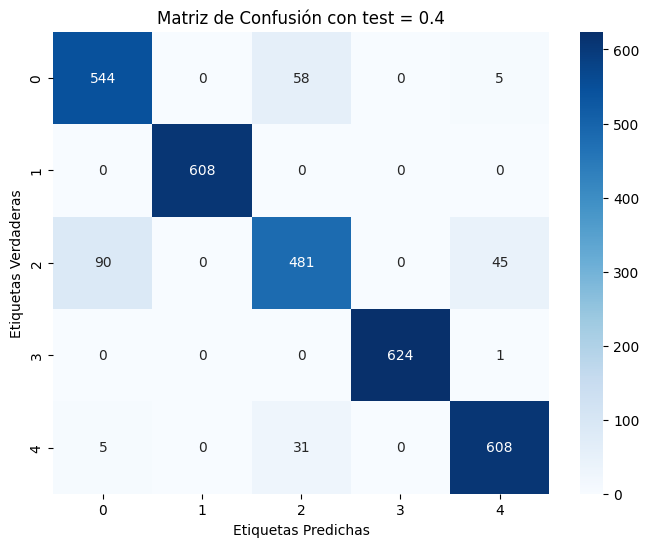

Exactitud del modelo: 0.9241935483870968
Precisión del modelo: 0.9237857506844707
Recall del modelo: 0.9241935483870968
Puntuación F1 del modelo: 0.923608143904705
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.5.png


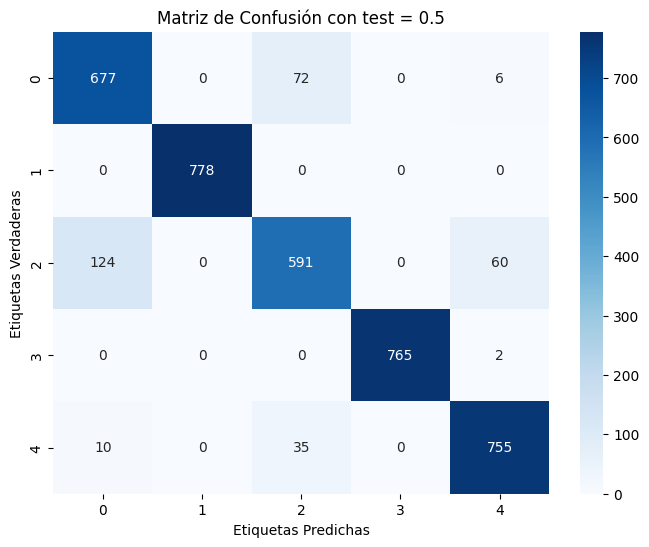

Exactitud del modelo: 0.920258064516129
Precisión del modelo: 0.9200901713404731
Recall del modelo: 0.920258064516129
Puntuación F1 del modelo: 0.9194797458401096
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.6.png


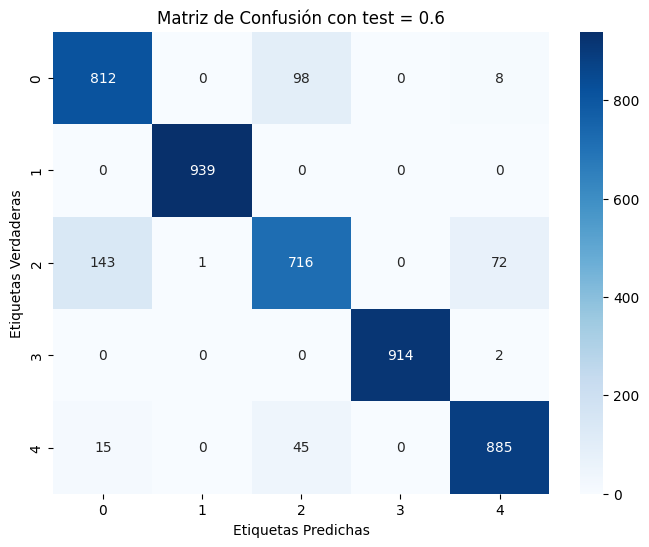

Exactitud del modelo: 0.9174193548387096
Precisión del modelo: 0.9170288661528966
Recall del modelo: 0.9174193548387096
Puntuación F1 del modelo: 0.9168033136105205
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.7.png


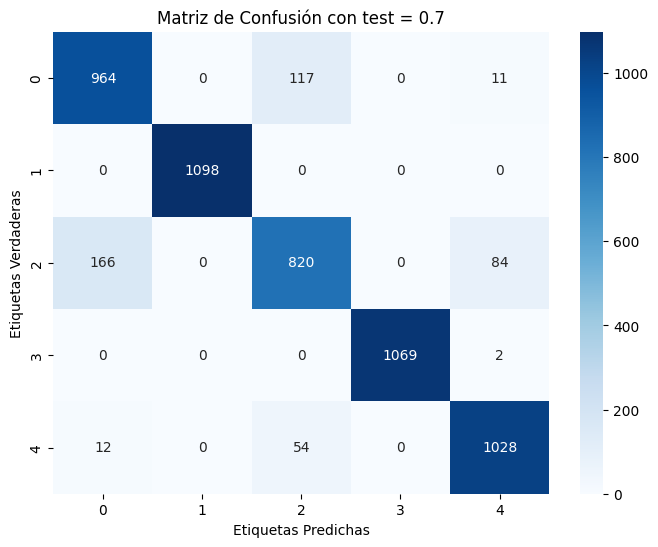

Exactitud del modelo: 0.9177880184331797
Precisión del modelo: 0.9172045251117322
Recall del modelo: 0.9177880184331797
Puntuación F1 del modelo: 0.9171416288116955
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.8.png


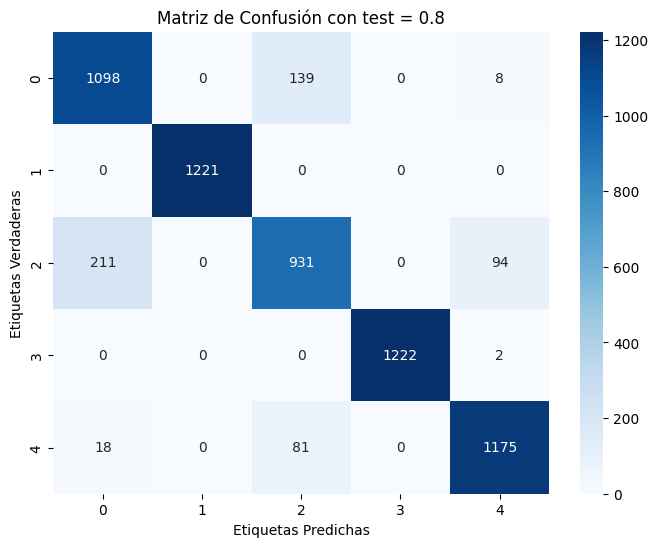

Exactitud del modelo: 0.9108064516129032
Precisión del modelo: 0.9105339583174161
Recall del modelo: 0.9108064516129032
Puntuación F1 del modelo: 0.9102974580499329
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.9.png


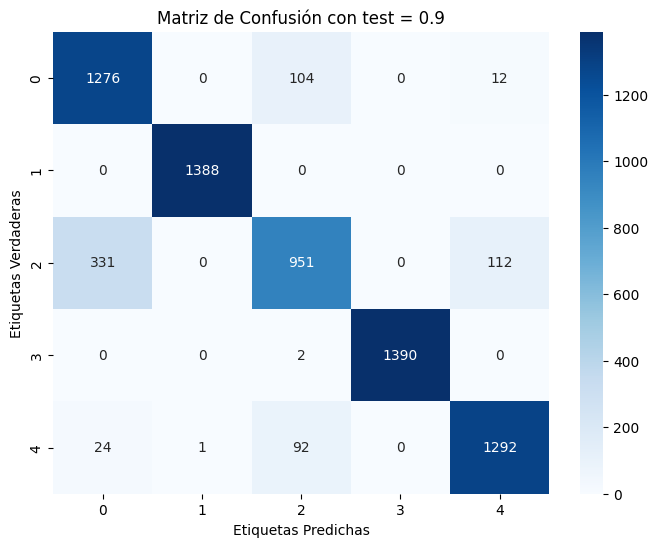

Exactitud del modelo: 0.9027956989247312
Precisión del modelo: 0.904288835287421
Recall del modelo: 0.9027956989247312
Puntuación F1 del modelo: 0.9010808460642906
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_5_vecinos/KNN_llava_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_cruz_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_2.png


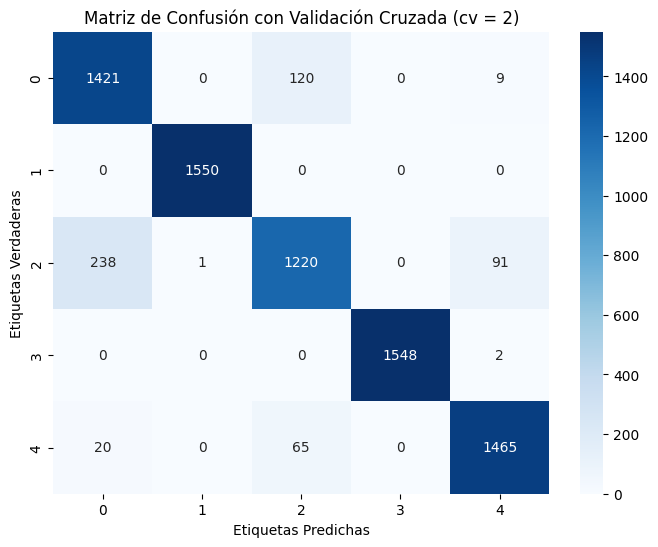

Exactitud media: 0.9295483870967742
Precisión media: 0.9297854457452036
Recall media: 0.9295483870967742
Puntuación F1 media: 0.928981226996508
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_3.png


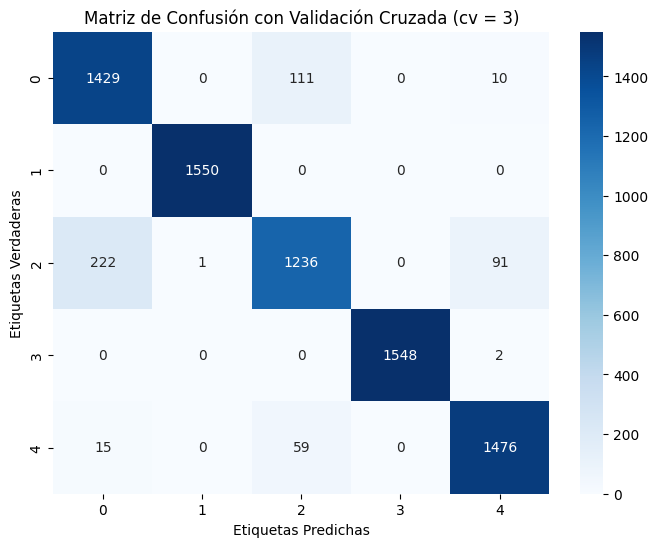

Exactitud media: 0.9340645161290323
Precisión media: 0.9341913617767303
Recall media: 0.9340645161290323
Puntuación F1 media: 0.9334822334843165
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_4.png


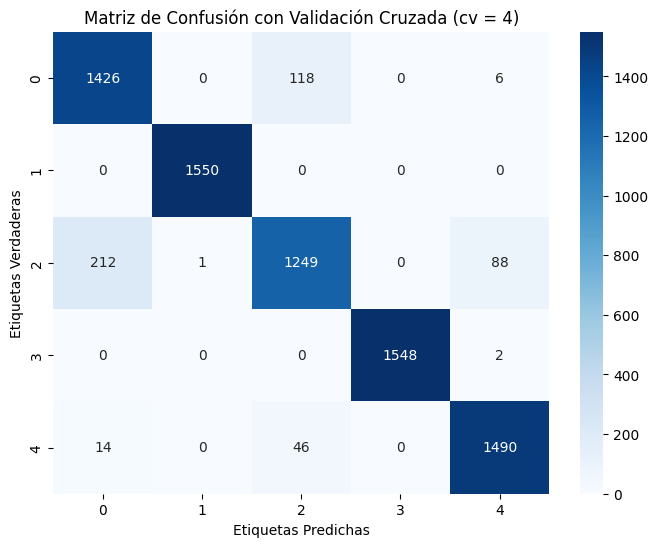

Exactitud media: 0.9371612903225807
Precisión media: 0.9371913273173169
Recall media: 0.9371612903225807
Puntuación F1 media: 0.9366089651999108
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_5.png


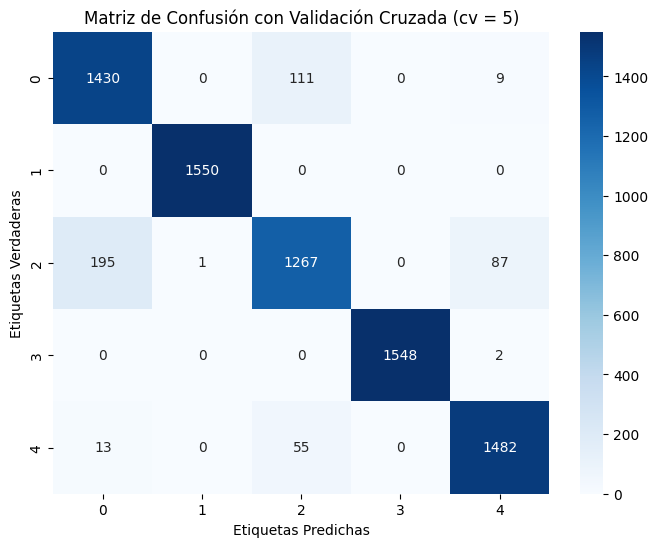

Exactitud media: 0.9389677419354838
Precisión media: 0.9389009836007193
Recall media: 0.9389677419354838
Puntuación F1 media: 0.9385182737711717
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_6.png


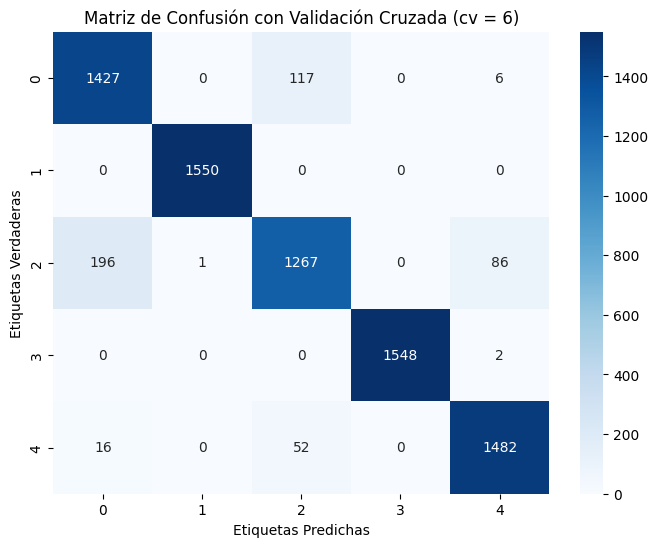

Exactitud media: 0.9385806451612904
Precisión media: 0.938535079887062
Recall media: 0.9385806451612904
Puntuación F1 media: 0.9381573700311046
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_7.png


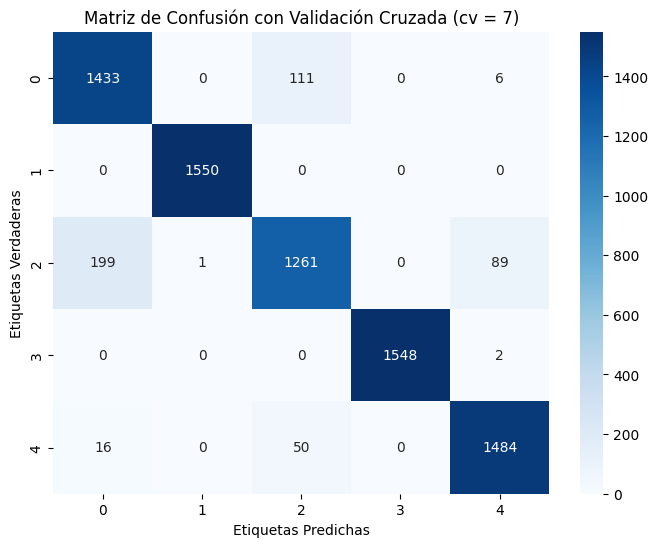

Exactitud media: 0.9388387096774193
Precisión media: 0.9388639400371718
Recall media: 0.9388387096774193
Puntuación F1 media: 0.9383487653598791
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_8.png


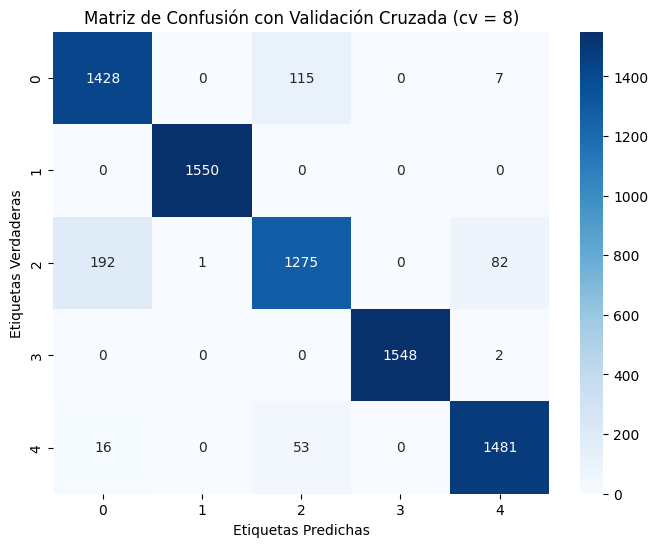

Exactitud media: 0.9396129032258065
Precisión media: 0.939580746646928
Recall media: 0.9396129032258065
Puntuación F1 media: 0.9392385127730142
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_9.png


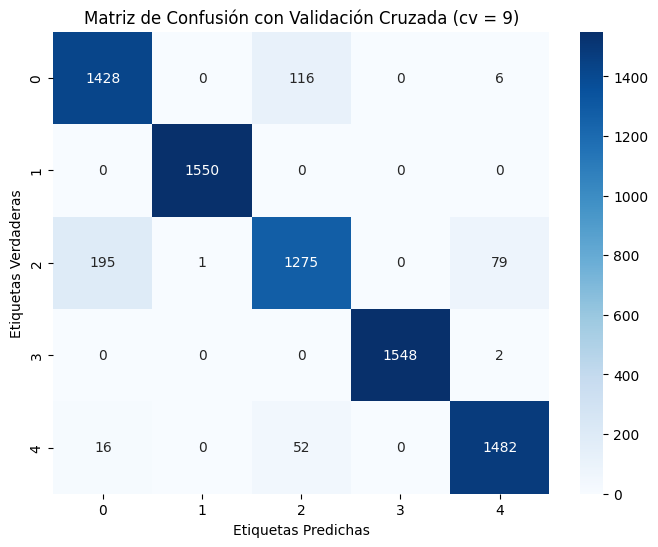

Exactitud media: 0.939741935483871
Precisión media: 0.939748954537809
Recall media: 0.939741935483871
Puntuación F1 media: 0.9393806107189514
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_10.png


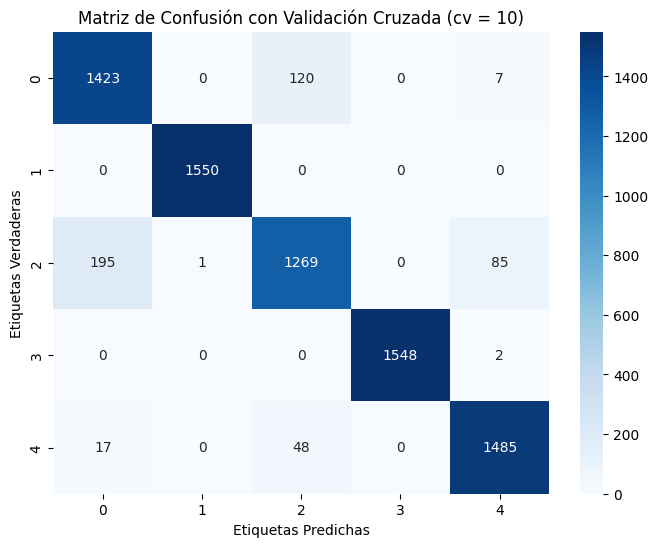

Exactitud media: 0.9387096774193548
Precisión media: 0.9386500135023167
Recall media: 0.9387096774193548
Puntuación F1 media: 0.9382925046298012
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_5_vecinos/KNN_llava_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_simple_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.1.png


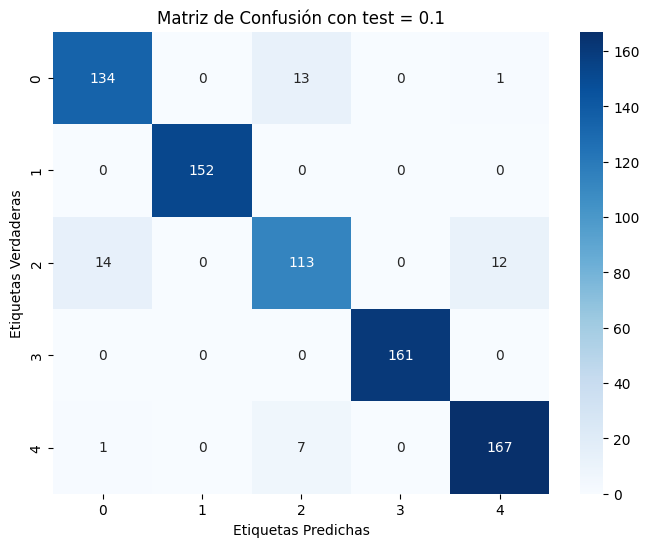

Exactitud del modelo: 0.9380645161290323
Precisión del modelo: 0.9374961633715522
Recall del modelo: 0.9380645161290323
Puntuación F1 del modelo: 0.9376636850730178
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.2.png


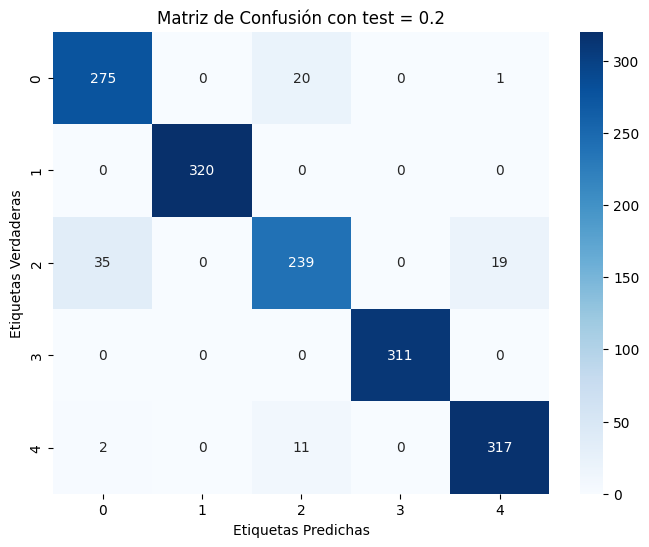

Exactitud del modelo: 0.9432258064516129
Precisión del modelo: 0.9430142744669402
Recall del modelo: 0.9432258064516129
Puntuación F1 del modelo: 0.9427097334546893
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.3.png


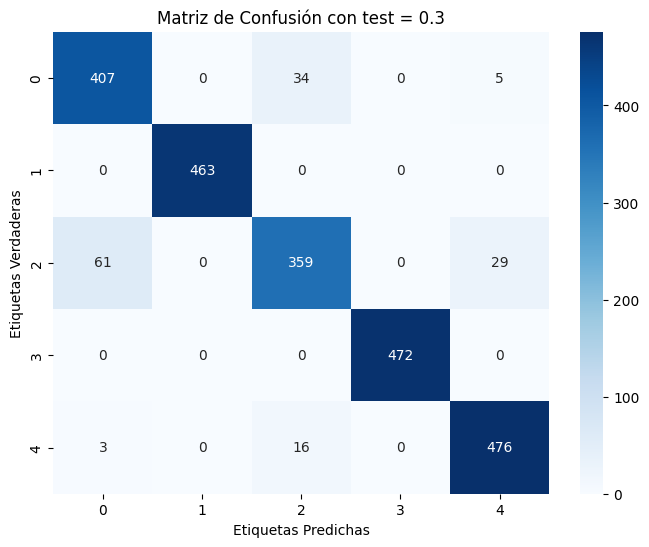

Exactitud del modelo: 0.9363440860215054
Precisión del modelo: 0.9361320653981622
Recall del modelo: 0.9363440860215054
Puntuación F1 del modelo: 0.9357144748477668
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.4.png


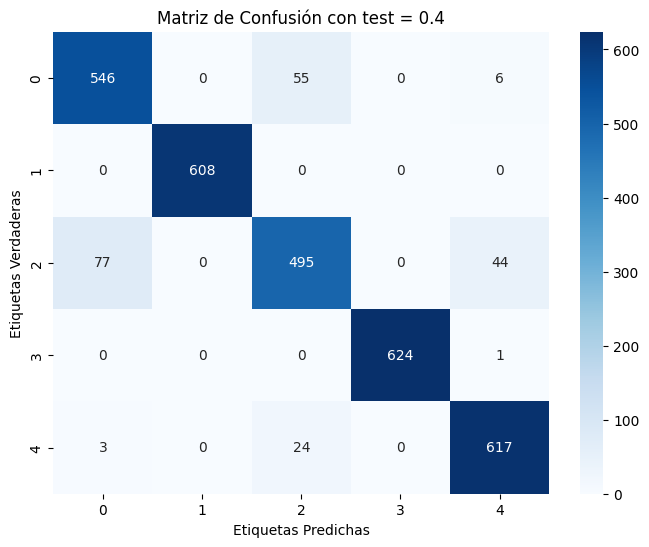

Exactitud del modelo: 0.932258064516129
Precisión del modelo: 0.9317677298517542
Recall del modelo: 0.932258064516129
Puntuación F1 del modelo: 0.9316999926596929
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.5.png


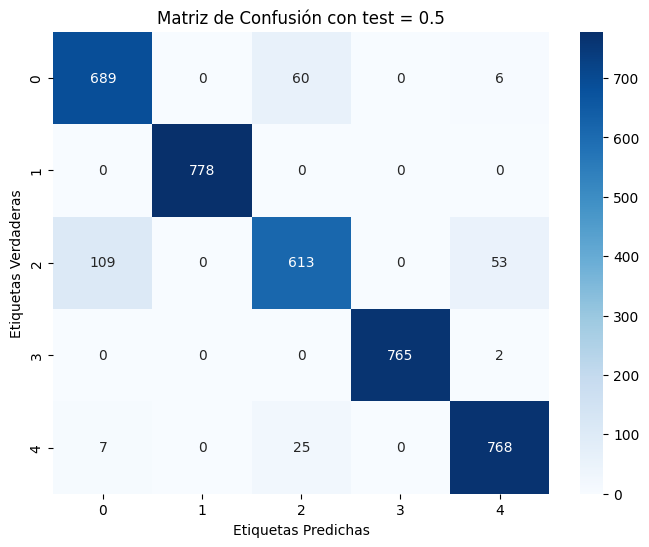

Exactitud del modelo: 0.9323870967741935
Precisión del modelo: 0.9323773095157958
Recall del modelo: 0.9323870967741935
Puntuación F1 del modelo: 0.9316870444608459
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.6.png


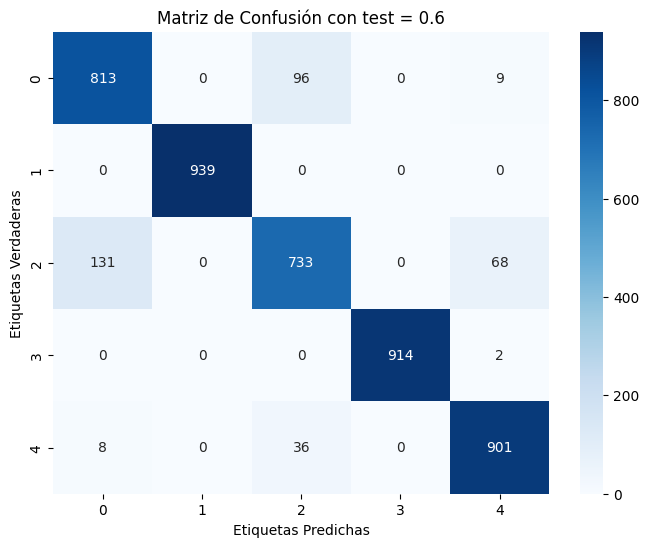

Exactitud del modelo: 0.9247311827956989
Precisión del modelo: 0.9242067606084016
Recall del modelo: 0.9247311827956989
Puntuación F1 del modelo: 0.9241214427295336
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.7.png


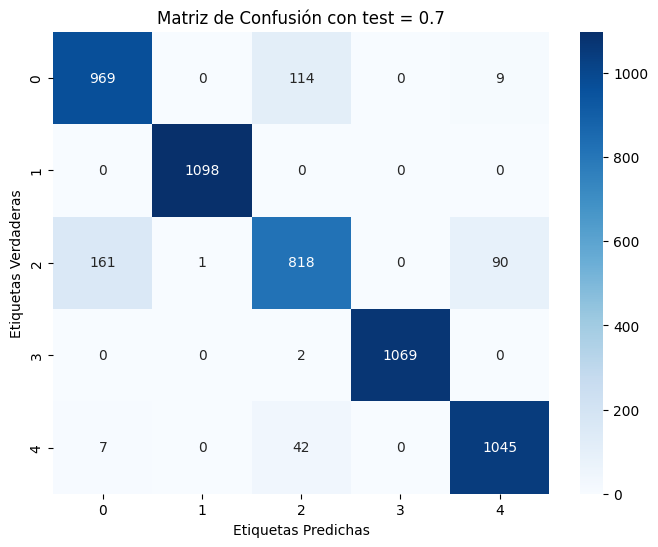

Exactitud del modelo: 0.9214746543778802
Precisión del modelo: 0.9206930315939956
Recall del modelo: 0.9214746543778802
Puntuación F1 del modelo: 0.9205846255123532
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.8.png


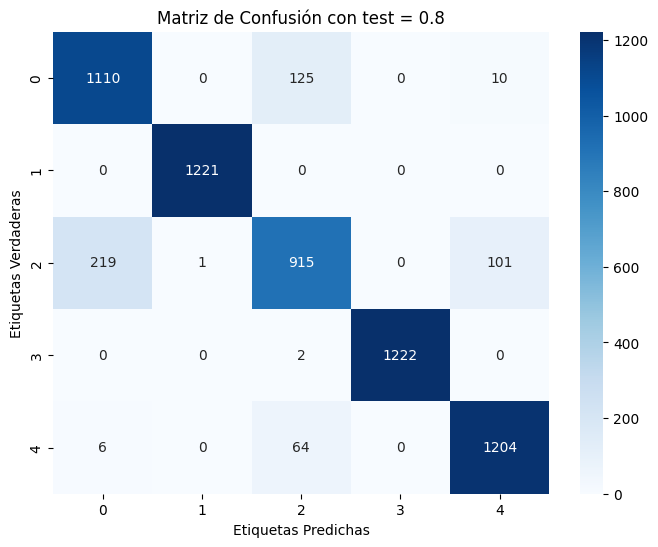

Exactitud del modelo: 0.9148387096774193
Precisión del modelo: 0.9142225682113887
Recall del modelo: 0.9148387096774193
Puntuación F1 del modelo: 0.9137905739916916
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.9.png


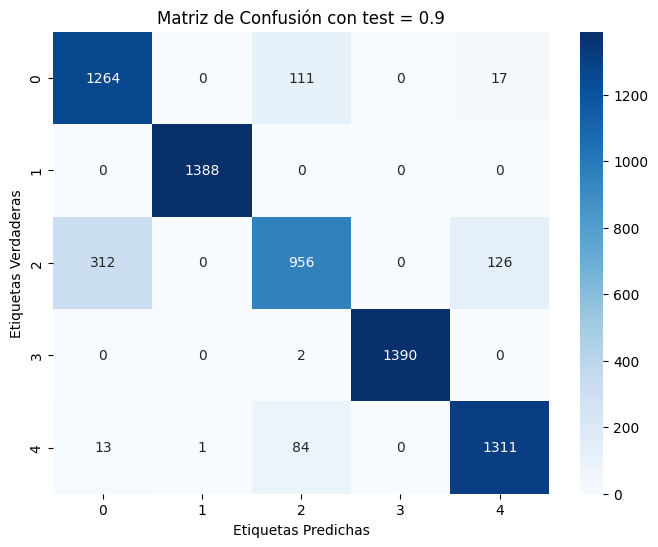

Exactitud del modelo: 0.9045161290322581
Precisión del modelo: 0.9050239640456297
Recall del modelo: 0.9045161290322581
Puntuación F1 del modelo: 0.9026264582322411
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_7_vecinos/KNN_llava_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_cruz_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_2.png


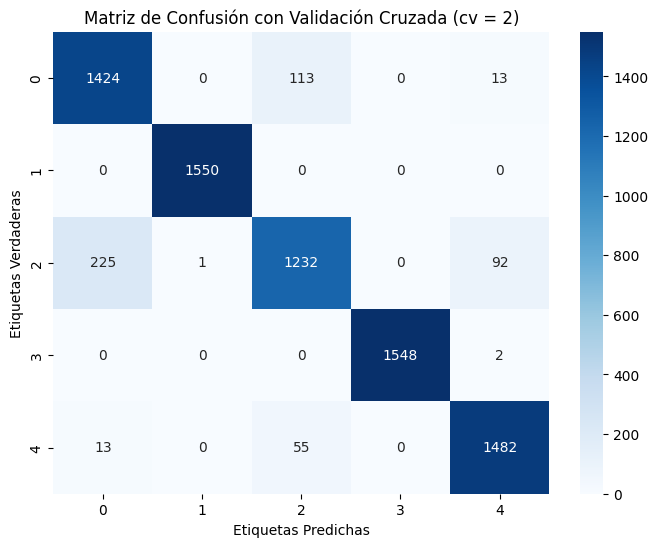

Exactitud media: 0.9336774193548387
Precisión media: 0.9337632687167278
Recall media: 0.9336774193548387
Puntuación F1 media: 0.9330421825625442
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_3.png


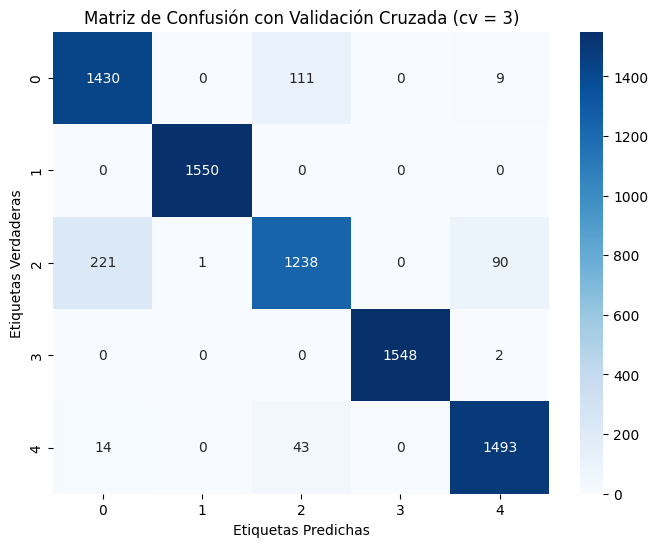

Exactitud media: 0.9366451612903226
Precisión media: 0.9368438639677031
Recall media: 0.9366451612903226
Puntuación F1 media: 0.9359923873511202
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_4.png


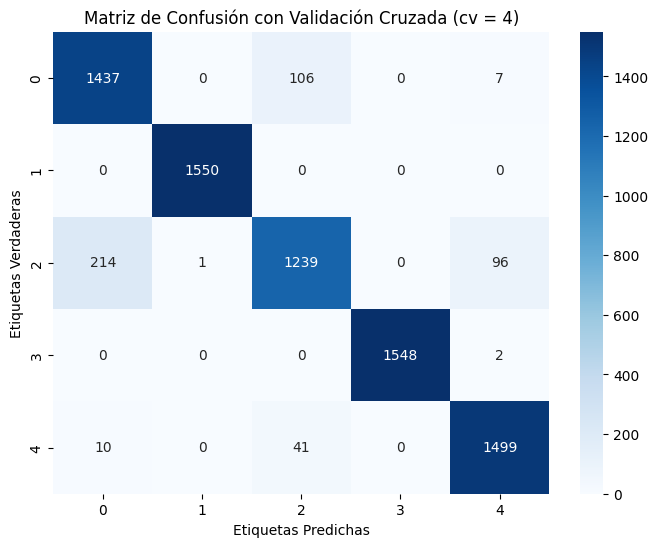

Exactitud media: 0.9384516129032258
Precisión media: 0.9385949566031804
Recall media: 0.9384516129032258
Puntuación F1 media: 0.9377249329685712
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_5.png


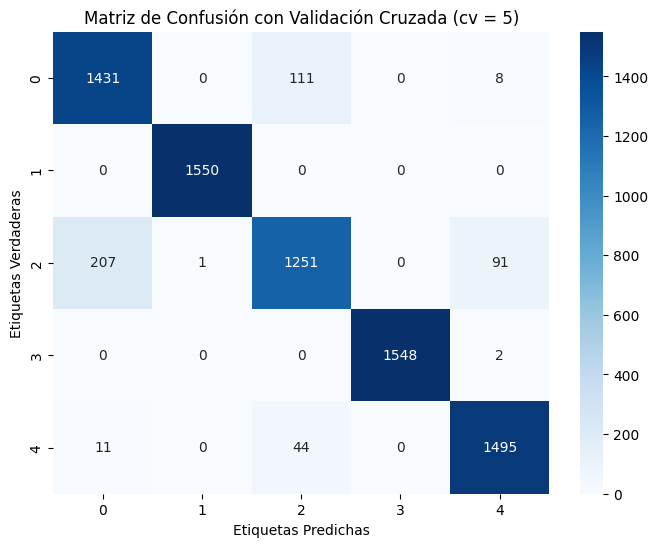

Exactitud media: 0.9387096774193548
Precisión media: 0.9387257783488624
Recall media: 0.9387096774193548
Puntuación F1 media: 0.9381027642711514
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_6.png


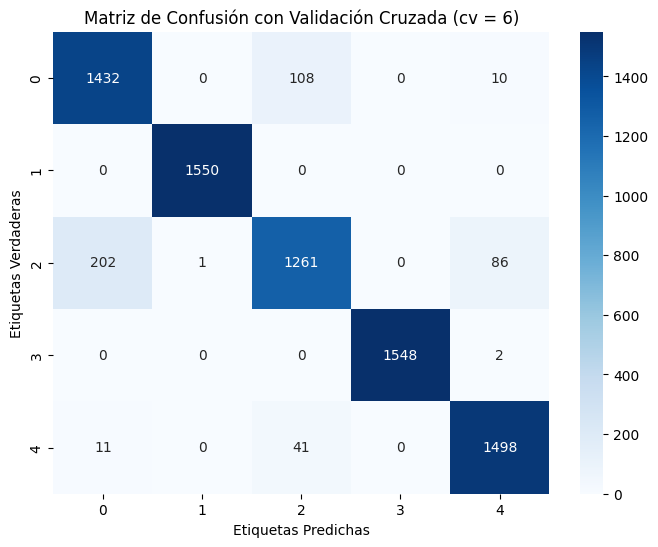

Exactitud media: 0.9405161290322581
Precisión media: 0.9405589408724906
Recall media: 0.9405161290322581
Puntuación F1 media: 0.9399560010916821
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_7.png


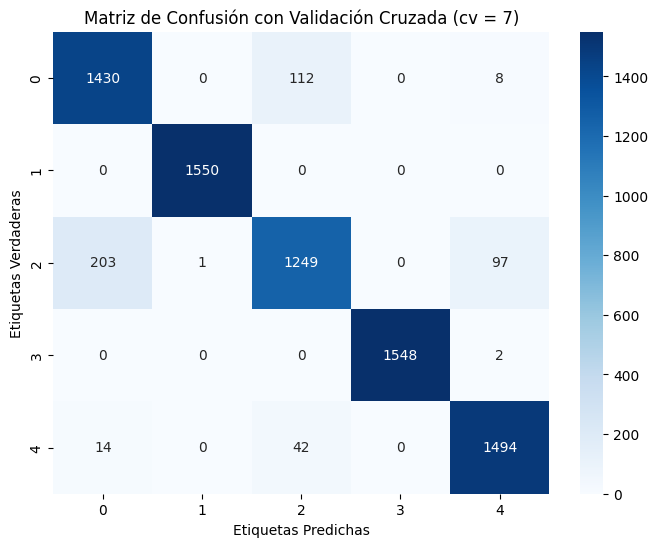

Exactitud media: 0.9381935483870968
Precisión media: 0.9382005060362393
Recall media: 0.9381935483870968
Puntuación F1 media: 0.9375620833640431
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_8.png


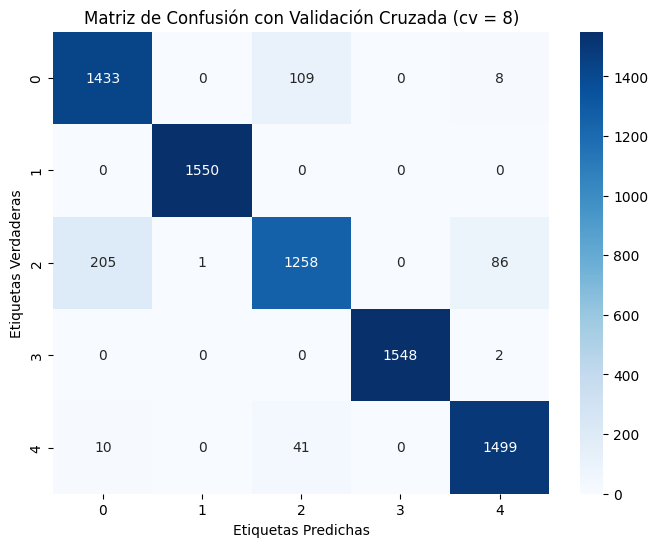

Exactitud media: 0.9403870967741935
Precisión media: 0.9404343821884948
Recall media: 0.9403870967741935
Puntuación F1 media: 0.9398101830845712
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_9.png


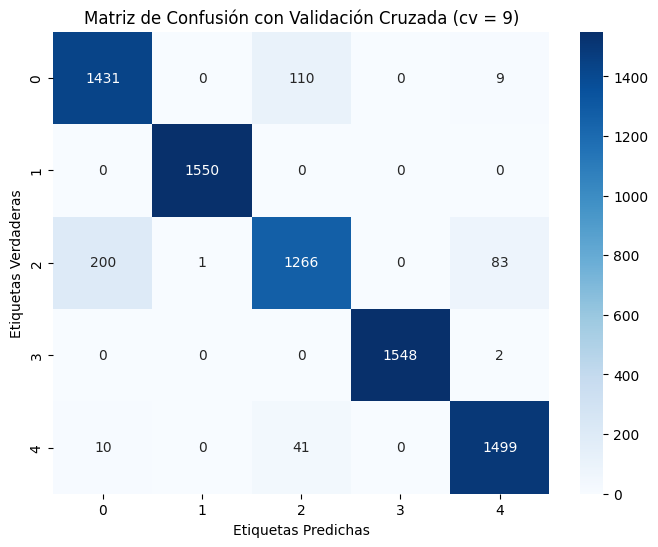

Exactitud media: 0.9411612903225807
Precisión media: 0.9411626365638666
Recall media: 0.9411612903225807
Puntuación F1 media: 0.9406364926217374
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_10.png


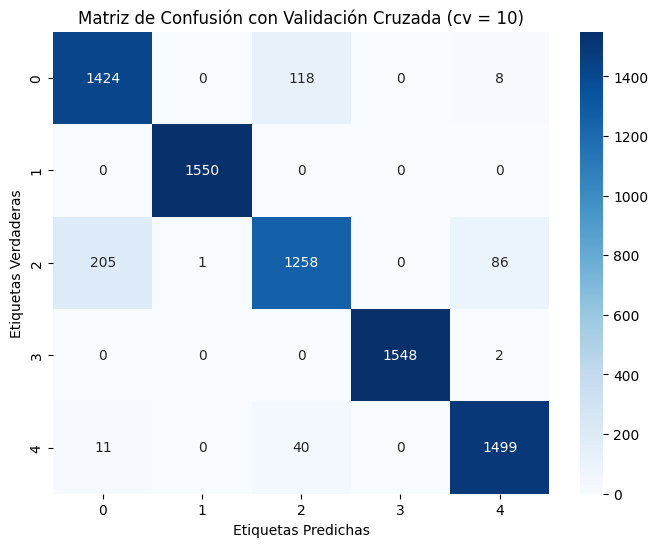

Exactitud media: 0.9392258064516129
Precisión media: 0.9391755857845967
Recall media: 0.9392258064516129
Puntuación F1 media: 0.9386723136417235
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_7_vecinos/KNN_llava_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_simple_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.1.png


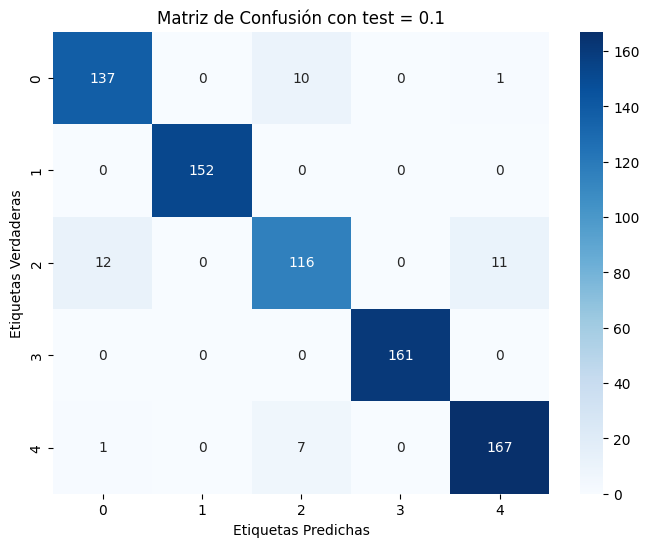

Exactitud del modelo: 0.9458064516129032
Precisión del modelo: 0.9453865451157177
Recall del modelo: 0.9458064516129032
Puntuación F1 del modelo: 0.9454869094096078
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.2.png


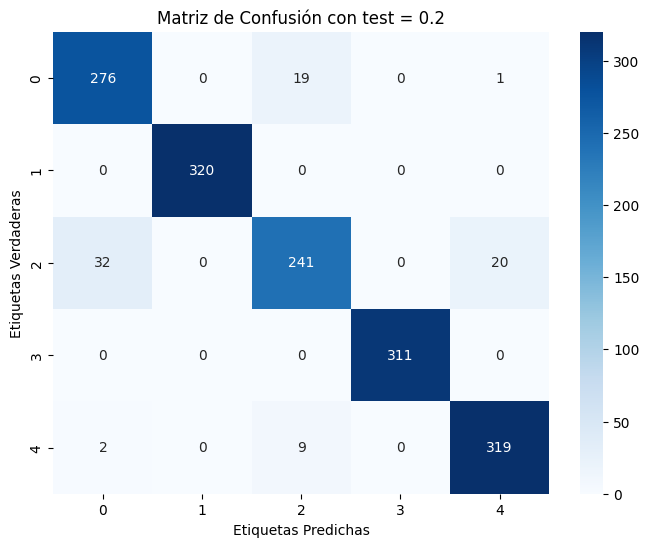

Exactitud del modelo: 0.9464516129032258
Precisión del modelo: 0.9462290255908714
Recall del modelo: 0.9464516129032258
Puntuación F1 del modelo: 0.9459060537374232
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.3.png


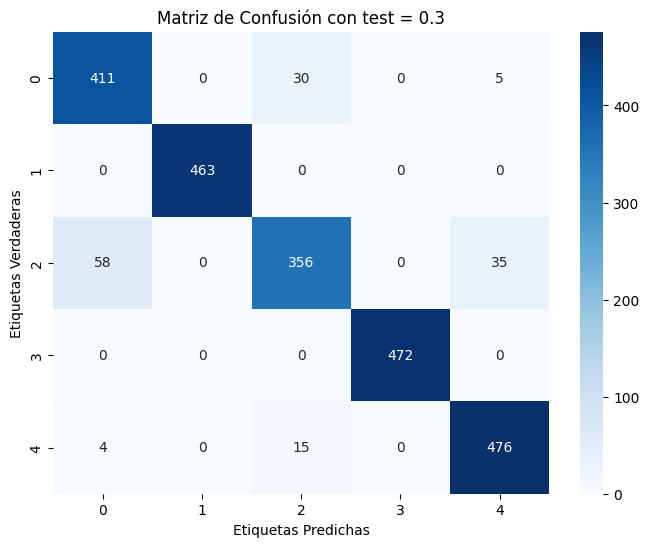

Exactitud del modelo: 0.9367741935483871
Precisión del modelo: 0.9366797786501714
Recall del modelo: 0.9367741935483871
Puntuación F1 del modelo: 0.9359747128796712
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.4.png


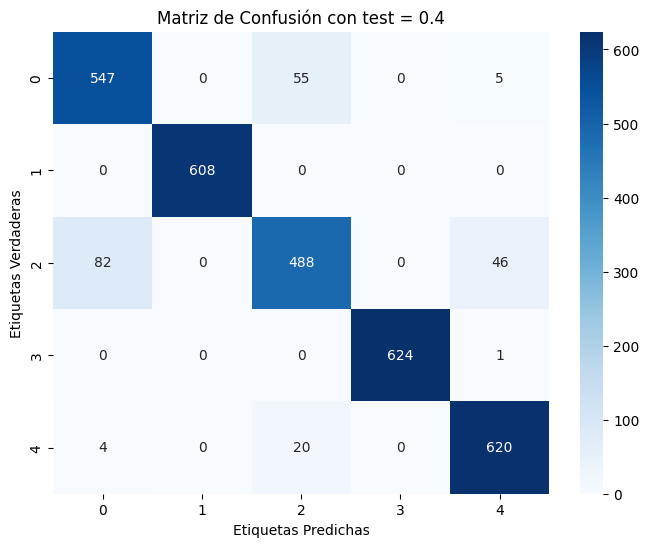

Exactitud del modelo: 0.9312903225806451
Precisión del modelo: 0.9308511810867535
Recall del modelo: 0.9312903225806451
Puntuación F1 del modelo: 0.9305729001368388
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.5.png


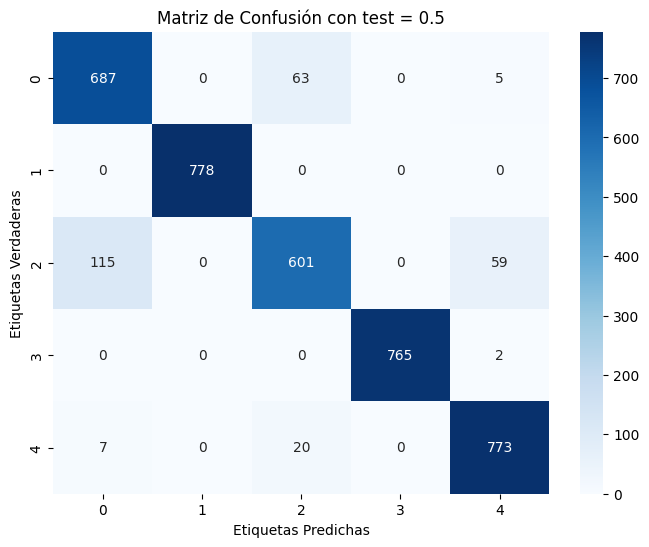

Exactitud del modelo: 0.9300645161290323
Precisión del modelo: 0.9301081102601393
Recall del modelo: 0.9300645161290323
Puntuación F1 del modelo: 0.9291278650078403
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.6.png


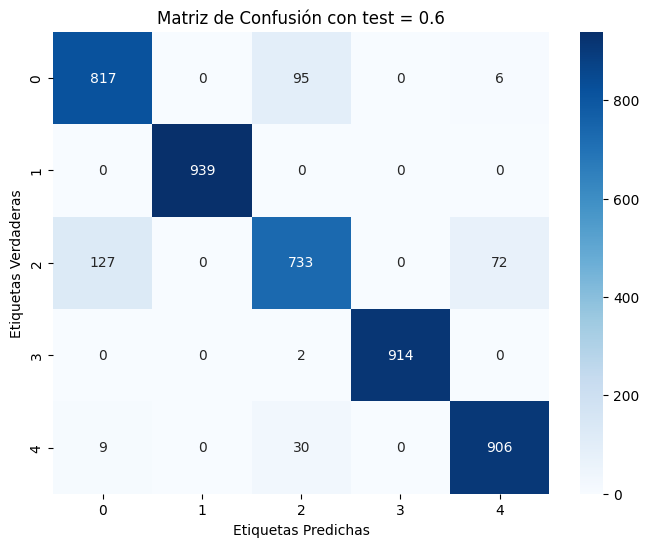

Exactitud del modelo: 0.9266666666666666
Precisión del modelo: 0.9261190663839532
Recall del modelo: 0.9266666666666666
Puntuación F1 del modelo: 0.9259890894951397
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.7.png


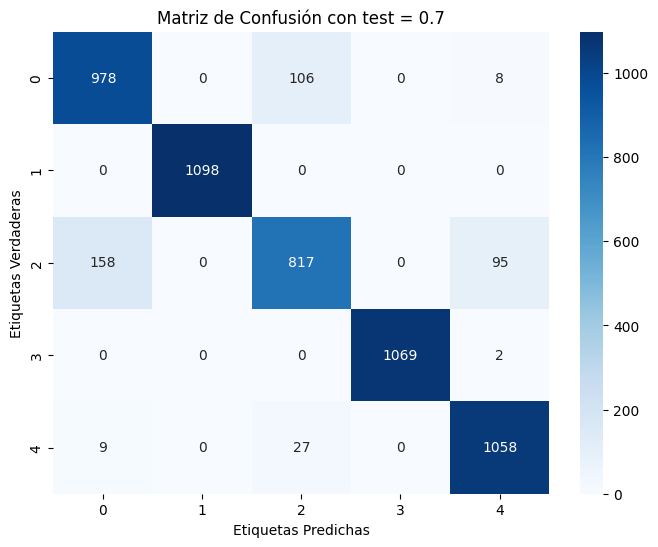

Exactitud del modelo: 0.9253456221198156
Precisión del modelo: 0.9248220663004987
Recall del modelo: 0.9253456221198156
Puntuación F1 del modelo: 0.9242429128259744
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.8.png


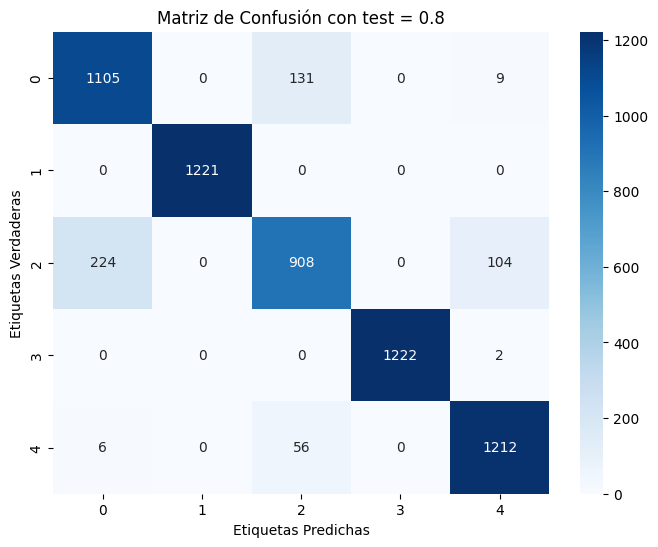

Exactitud del modelo: 0.9141935483870968
Precisión del modelo: 0.9135514891921467
Recall del modelo: 0.9141935483870968
Puntuación F1 del modelo: 0.9130129165325856
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.9.png


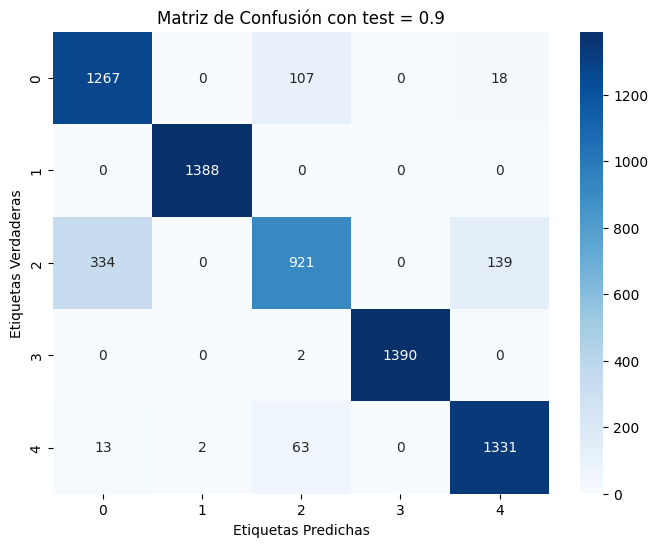

Exactitud del modelo: 0.9027956989247312
Precisión del modelo: 0.9040430066737116
Recall del modelo: 0.9027956989247312
Puntuación F1 del modelo: 0.9001579001092325
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_9_vecinos/KNN_llava_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_cruz_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_2.png


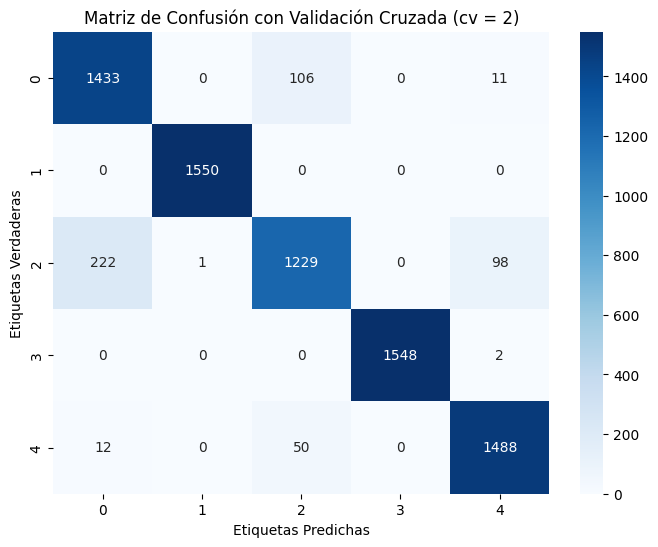

Exactitud media: 0.9352258064516129
Precisión media: 0.9353859127013195
Recall media: 0.9352258064516129
Puntuación F1 media: 0.9344929421637939
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_3.png


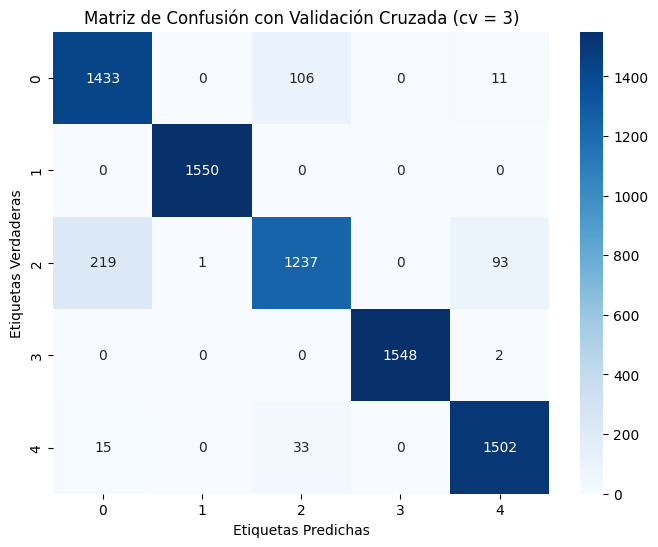

Exactitud media: 0.9380645161290323
Precisión media: 0.9384090978378222
Recall media: 0.9380645161290323
Puntuación F1 media: 0.9373363876213221
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_4.png


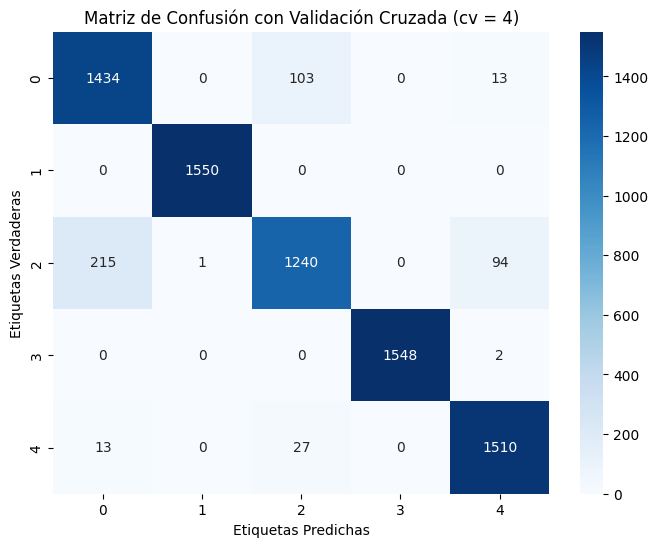

Exactitud media: 0.9396129032258065
Precisión media: 0.9399910237256444
Recall media: 0.9396129032258065
Puntuación F1 media: 0.9388461292525981
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_5.png


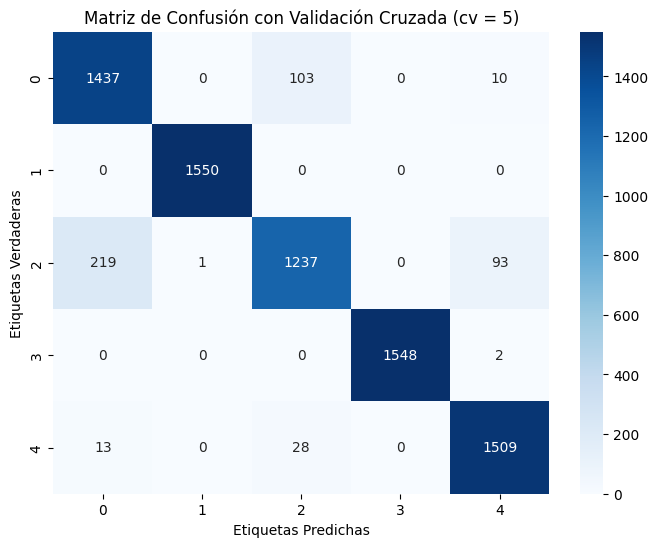

Exactitud media: 0.9394838709677419
Precisión media: 0.9399067732447842
Recall media: 0.9394838709677419
Puntuación F1 media: 0.9387105339081104
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_6.png


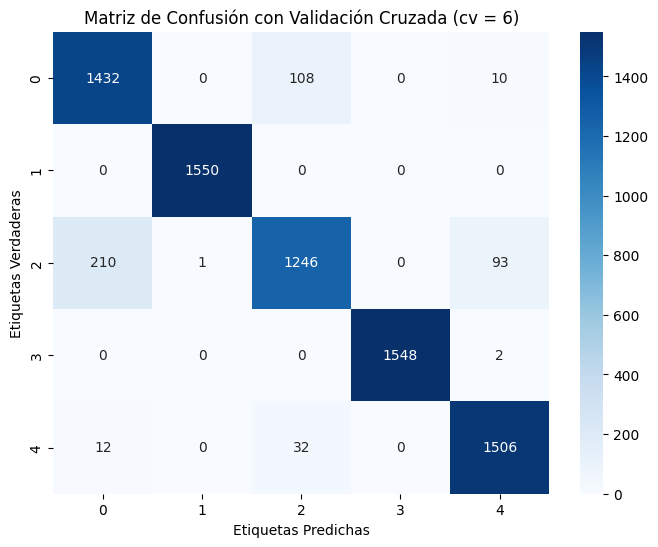

Exactitud media: 0.9396129032258065
Precisión media: 0.9397896344721169
Recall media: 0.9396129032258065
Puntuación F1 media: 0.9389102904546376
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_7.png


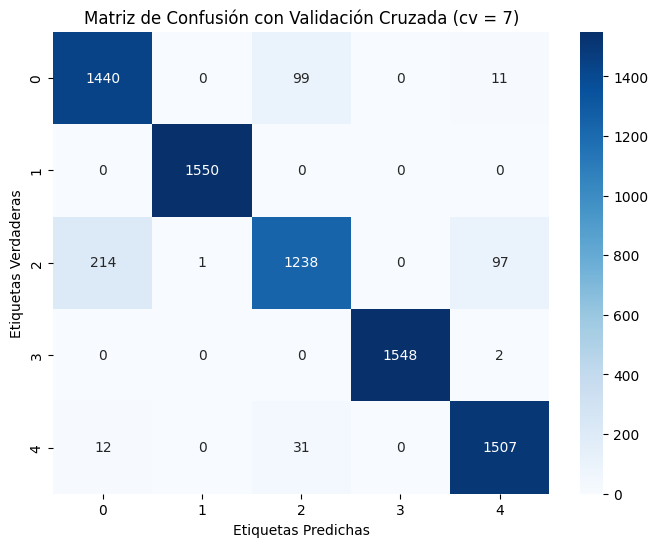

Exactitud media: 0.939741935483871
Precisión media: 0.9401289084638572
Recall media: 0.939741935483871
Puntuación F1 media: 0.9389540034895338
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_8.png


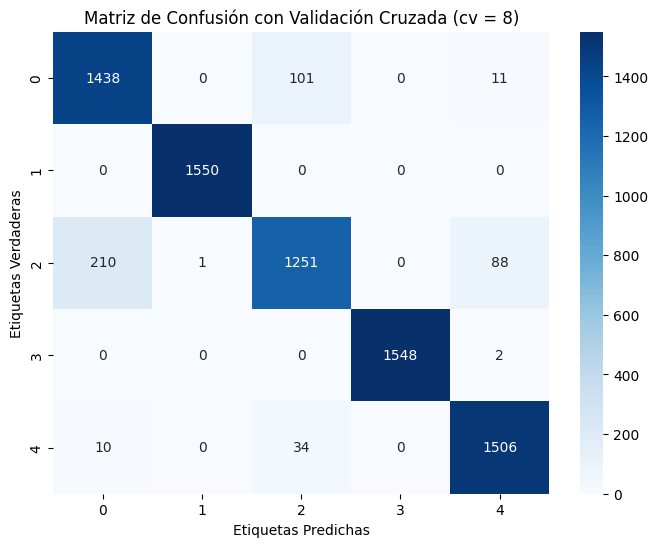

Exactitud media: 0.9410322580645162
Precisión media: 0.9412825276441311
Recall media: 0.9410322580645162
Puntuación F1 media: 0.9403581660406445
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_9.png


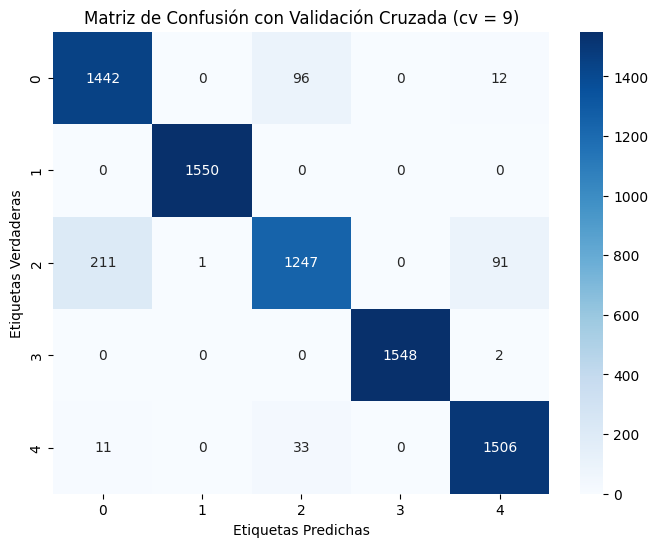

Exactitud media: 0.9410322580645162
Precisión media: 0.9414029768767228
Recall media: 0.9410322580645162
Puntuación F1 media: 0.9403154676726967
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_10.png


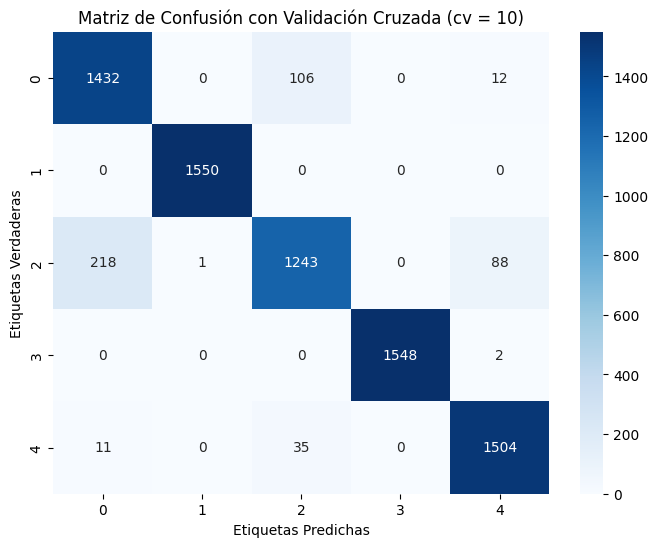

Exactitud media: 0.9389677419354838
Precisión media: 0.9392192115119458
Recall media: 0.9389677419354838
Puntuación F1 media: 0.9382757098244742
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_9_vecinos/KNN_llava_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_simple_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.1.png


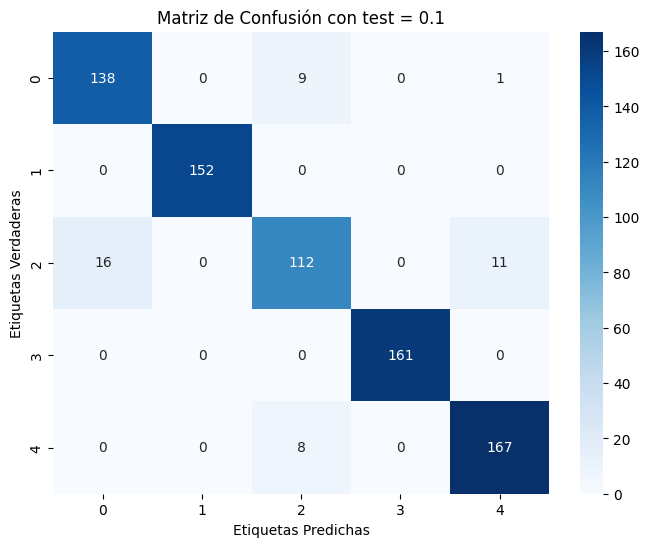

Exactitud del modelo: 0.9419354838709677
Precisión del modelo: 0.9413854239878623
Recall del modelo: 0.9419354838709677
Puntuación F1 del modelo: 0.9413553251272126
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.2.png


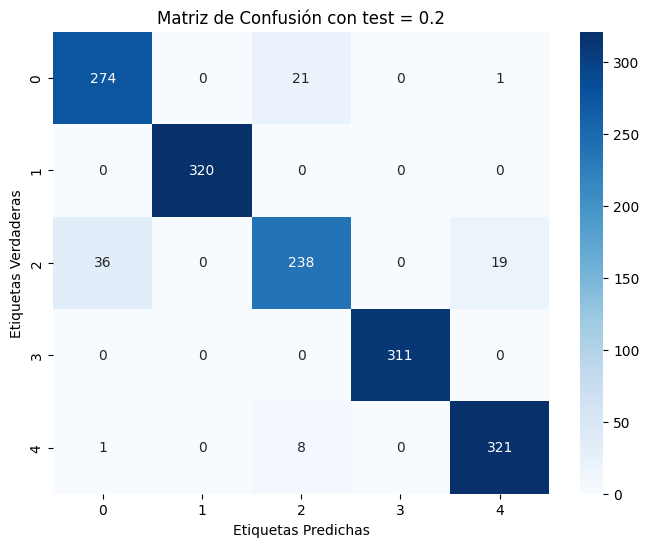

Exactitud del modelo: 0.944516129032258
Precisión del modelo: 0.9442617788188826
Recall del modelo: 0.944516129032258
Puntuación F1 del modelo: 0.9438817419198022
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.3.png


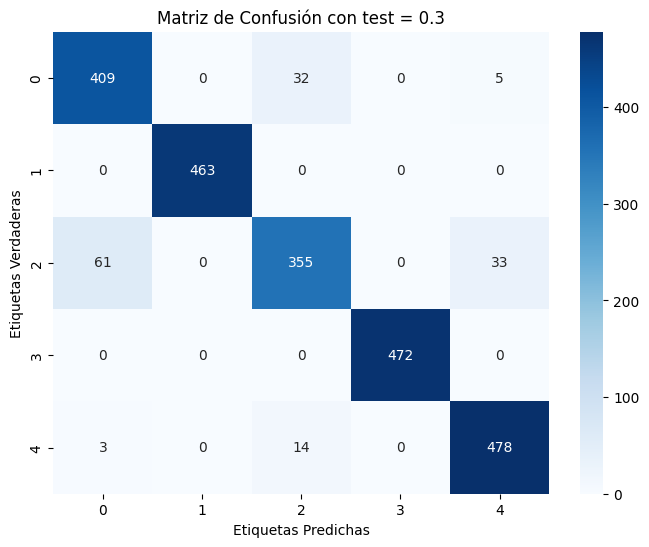

Exactitud del modelo: 0.9363440860215054
Precisión del modelo: 0.9362122813632451
Recall del modelo: 0.9363440860215054
Puntuación F1 del modelo: 0.9355277218716184
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.4.png


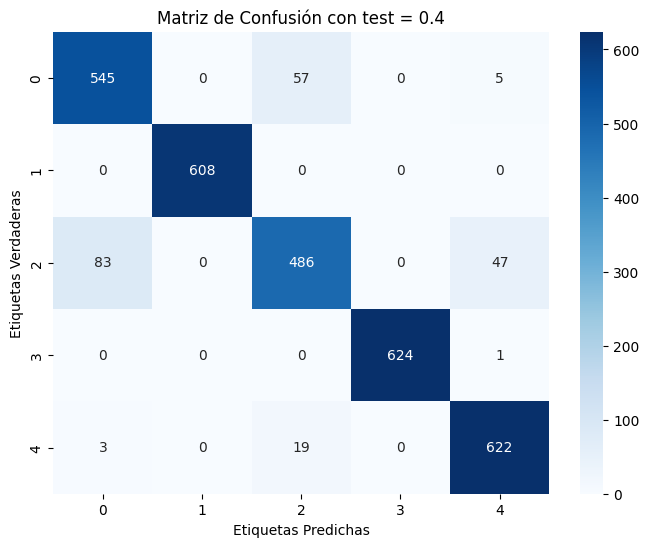

Exactitud del modelo: 0.9306451612903226
Precisión del modelo: 0.9301298649632532
Recall del modelo: 0.9306451612903226
Puntuación F1 del modelo: 0.9298690190669846
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.5.png


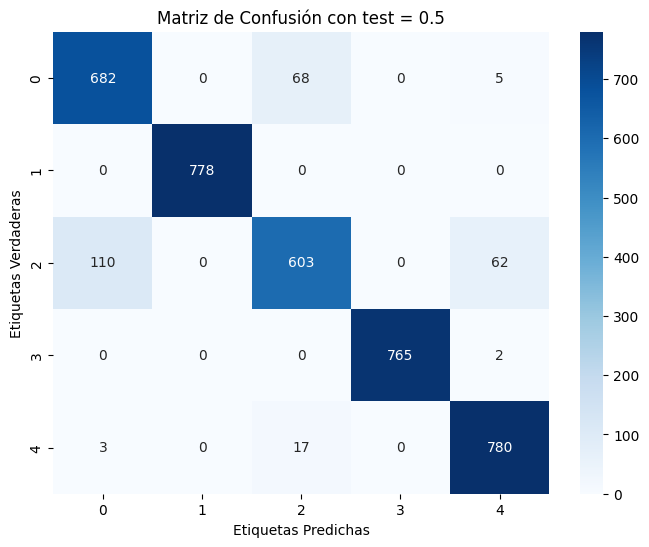

Exactitud del modelo: 0.9310967741935484
Precisión del modelo: 0.9308178890929146
Recall del modelo: 0.9310967741935484
Puntuación F1 del modelo: 0.9300850376731874
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.6.png


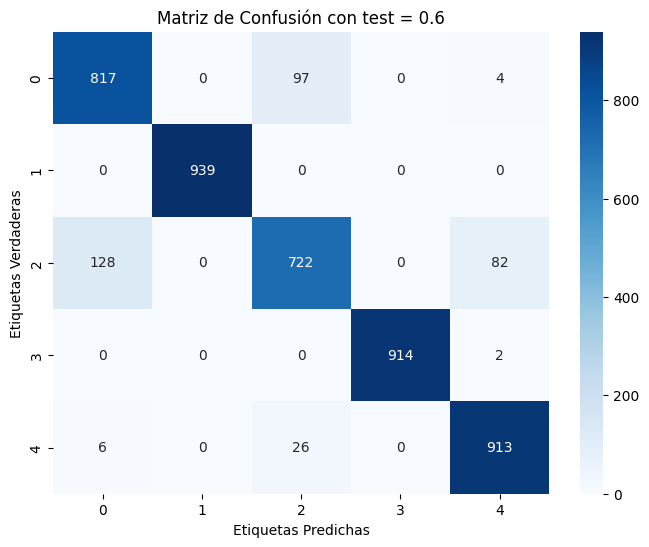

Exactitud del modelo: 0.9258064516129032
Precisión del modelo: 0.9251417234126723
Recall del modelo: 0.9258064516129032
Puntuación F1 del modelo: 0.924870646140187
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.7.png


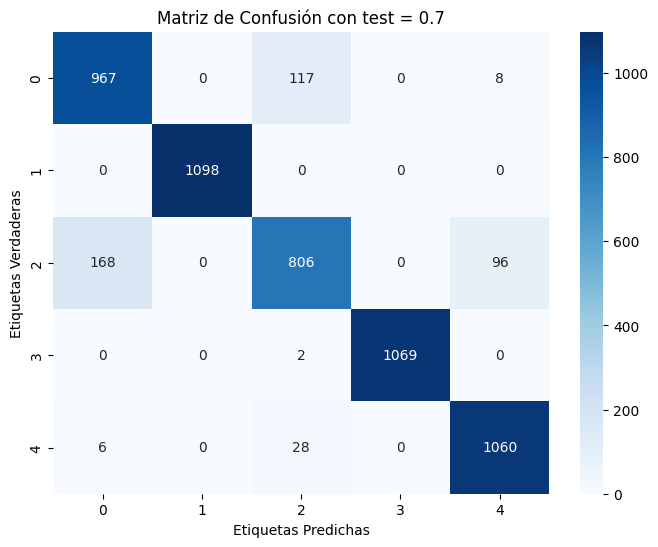

Exactitud del modelo: 0.9216589861751152
Precisión del modelo: 0.920862574905665
Recall del modelo: 0.9216589861751152
Puntuación F1 del modelo: 0.9204670265666702
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.8.png


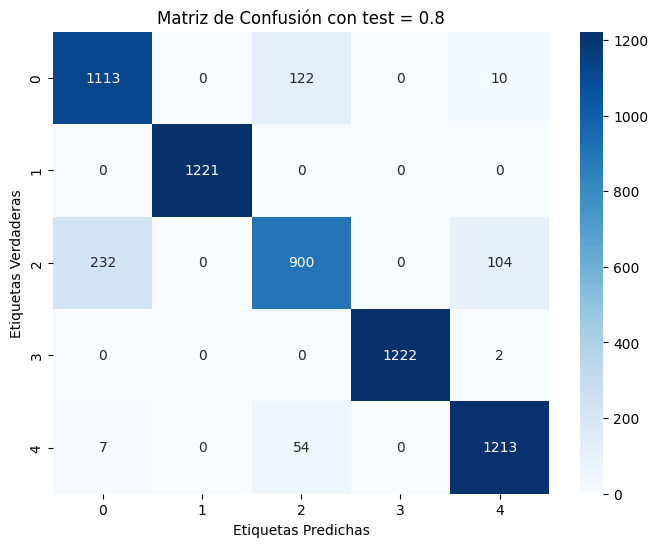

Exactitud del modelo: 0.9143548387096774
Precisión del modelo: 0.9139587966237562
Recall del modelo: 0.9143548387096774
Puntuación F1 del modelo: 0.9130315700397835
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.9.png


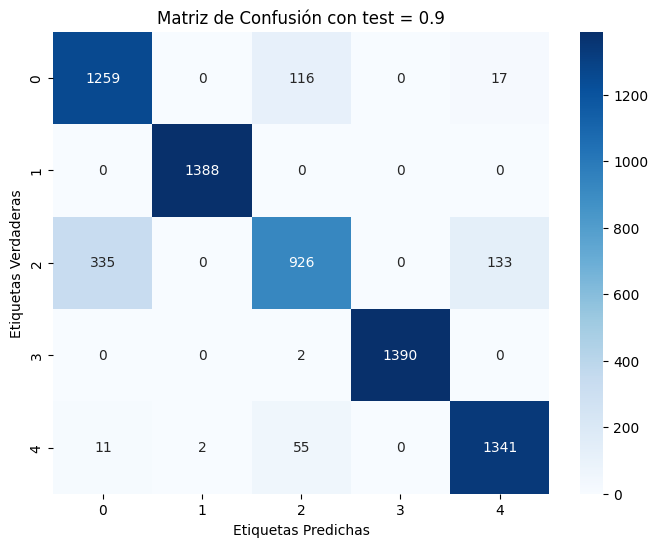

Exactitud del modelo: 0.9037992831541218
Precisión del modelo: 0.9049078797246499
Recall del modelo: 0.9037992831541218
Puntuación F1 del modelo: 0.9012442151955109
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_11_vecinos/KNN_llava_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_cruz_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_2.png


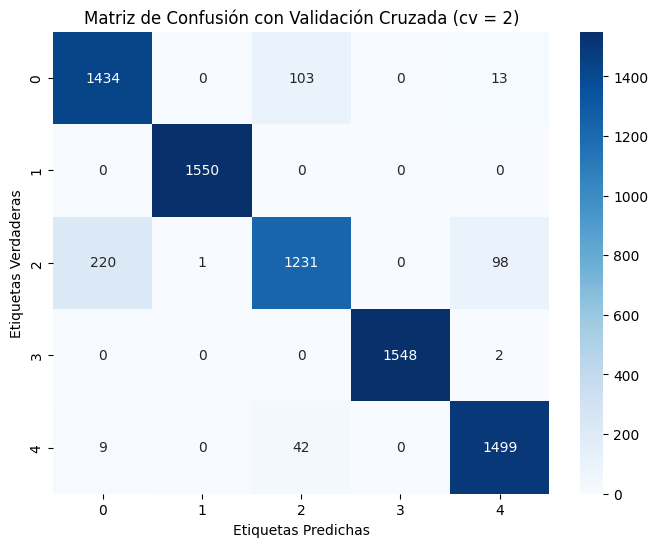

Exactitud media: 0.9370322580645162
Precisión media: 0.9372350291264543
Recall media: 0.9370322580645162
Puntuación F1 media: 0.9362422980491507
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_3.png


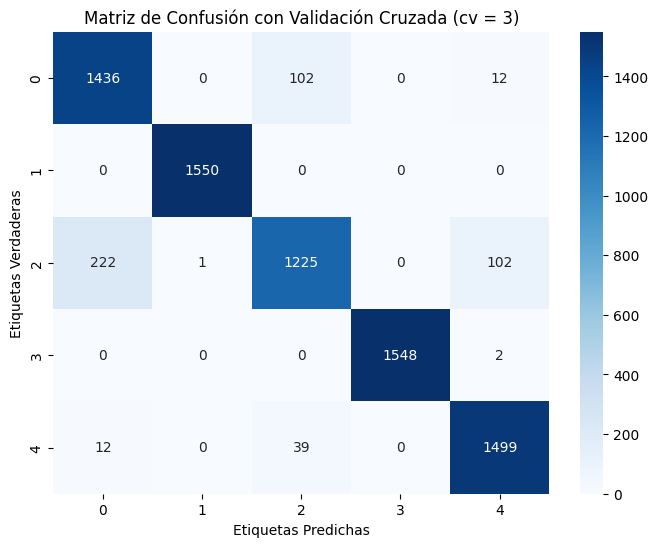

Exactitud media: 0.9365161290322581
Precisión media: 0.9368375570706041
Recall media: 0.9365161290322581
Puntuación F1 media: 0.9356769684735003
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_4.png


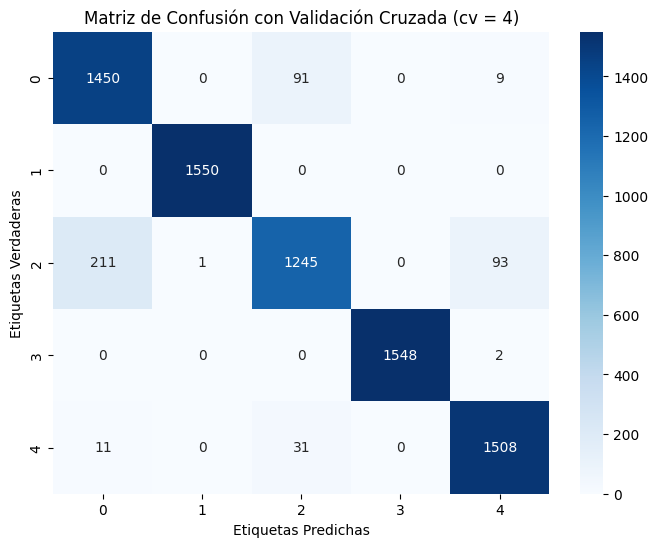

Exactitud media: 0.9420645161290323
Precisión media: 0.9425634961574347
Recall media: 0.9420645161290323
Puntuación F1 media: 0.9413074880635195
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_5.png


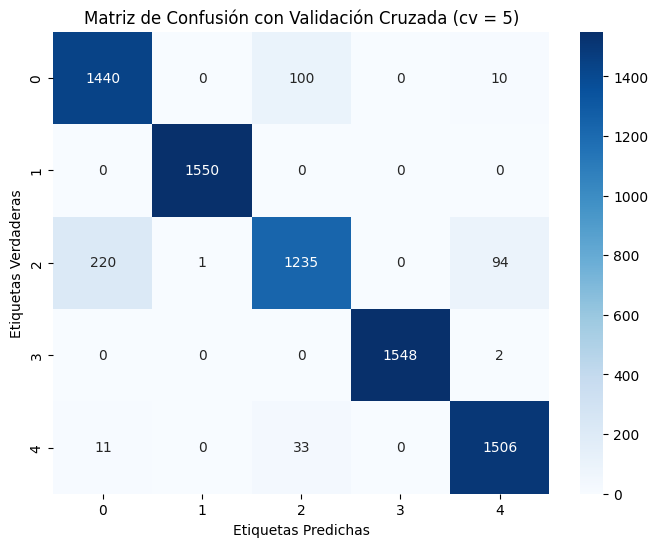

Exactitud media: 0.9392258064516129
Precisión media: 0.9396271268249115
Recall media: 0.9392258064516129
Puntuación F1 media: 0.9384392115075872
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_6.png


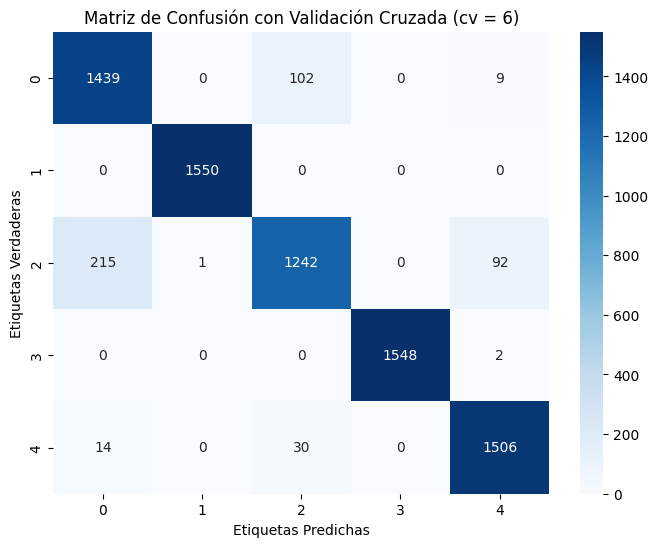

Exactitud media: 0.94
Precisión media: 0.9403960603432217
Recall media: 0.94
Puntuación F1 media: 0.9392727498910913
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_7.png


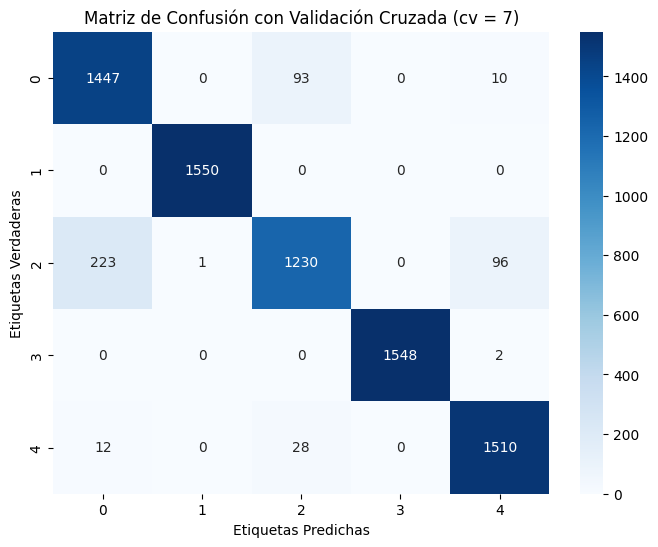

Exactitud media: 0.94
Precisión media: 0.9406656539688969
Recall media: 0.94
Puntuación F1 media: 0.9391438039861706
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_8.png


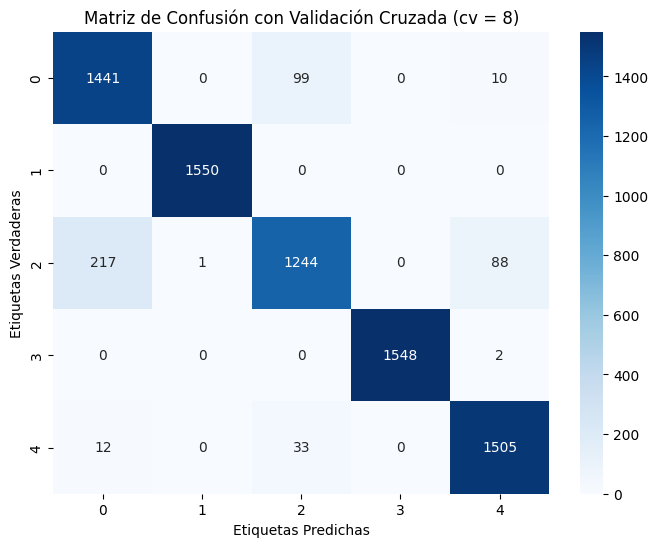

Exactitud media: 0.9403870967741935
Precisión media: 0.9407987955326228
Recall media: 0.9403870967741935
Puntuación F1 media: 0.939682358615029
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_9.png


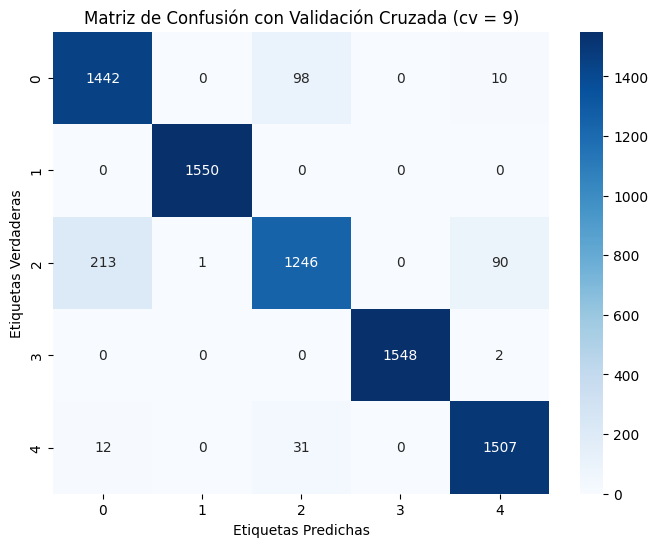

Exactitud media: 0.9410322580645162
Precisión media: 0.9414341310800246
Recall media: 0.9410322580645162
Puntuación F1 media: 0.9403169133456217
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_10.png


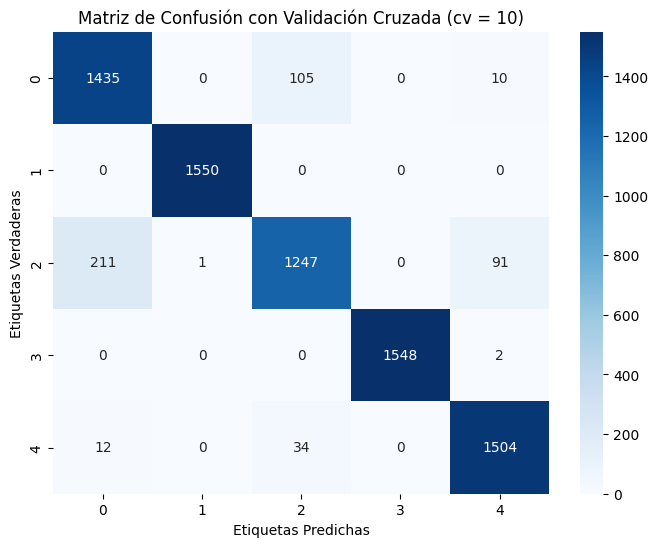

Exactitud media: 0.9398709677419355
Precisión media: 0.9400945342673347
Recall media: 0.9398709677419355
Puntuación F1 media: 0.9391857369432198
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_11_vecinos/KNN_llava_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_simple_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.1.png


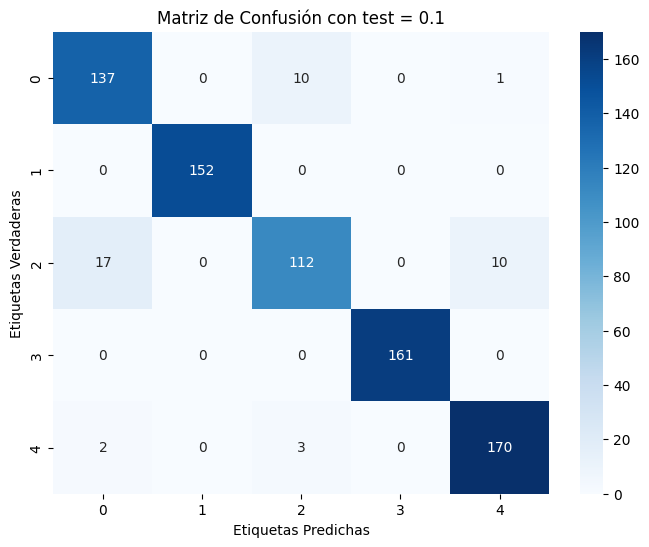

Exactitud del modelo: 0.944516129032258
Precisión del modelo: 0.9443651611075315
Recall del modelo: 0.944516129032258
Puntuación F1 del modelo: 0.9438309190221592
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.2.png


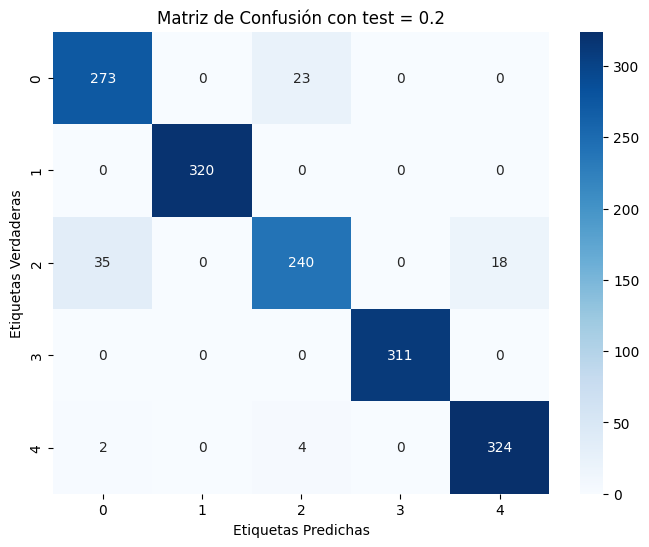

Exactitud del modelo: 0.9470967741935484
Precisión del modelo: 0.9468860214233277
Recall del modelo: 0.9470967741935484
Puntuación F1 del modelo: 0.9464840078477894
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.3.png


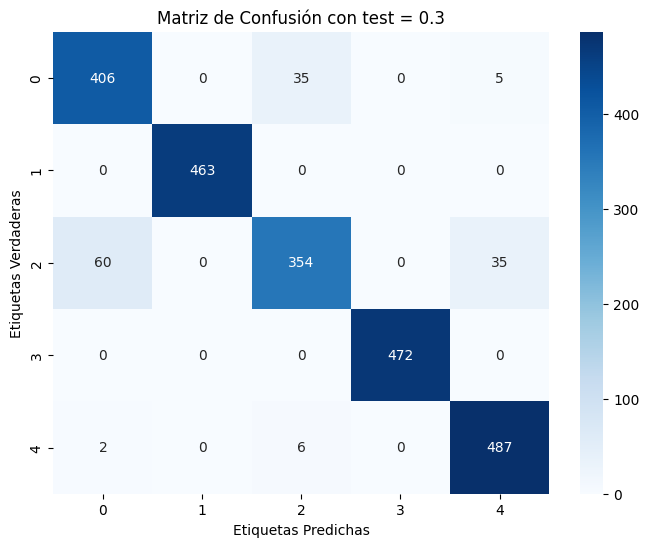

Exactitud del modelo: 0.938494623655914
Precisión del modelo: 0.9383820684422084
Recall del modelo: 0.938494623655914
Puntuación F1 del modelo: 0.9374745496455361
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.4.png


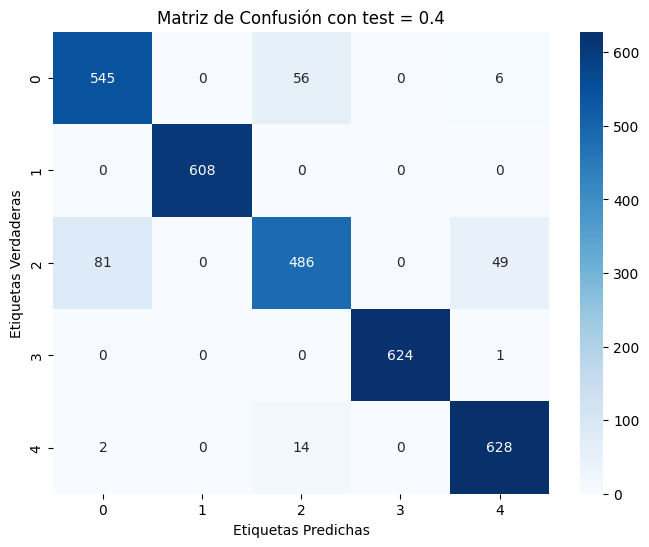

Exactitud del modelo: 0.9325806451612904
Precisión del modelo: 0.9320956047334333
Recall del modelo: 0.9325806451612904
Puntuación F1 del modelo: 0.9316765408472562
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.5.png


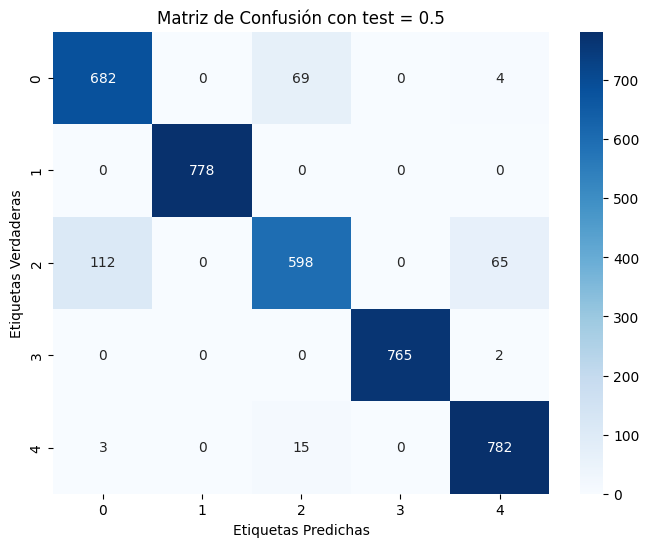

Exactitud del modelo: 0.9303225806451613
Precisión del modelo: 0.9300689469045722
Recall del modelo: 0.9303225806451613
Puntuación F1 del modelo: 0.929197295864241
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.6.png


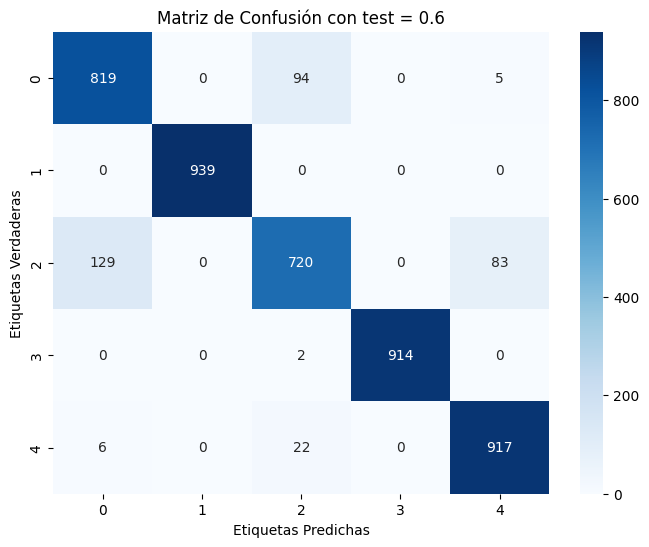

Exactitud del modelo: 0.9266666666666666
Precisión del modelo: 0.9260455471217812
Recall del modelo: 0.9266666666666666
Puntuación F1 del modelo: 0.9256496366933405
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.7.png


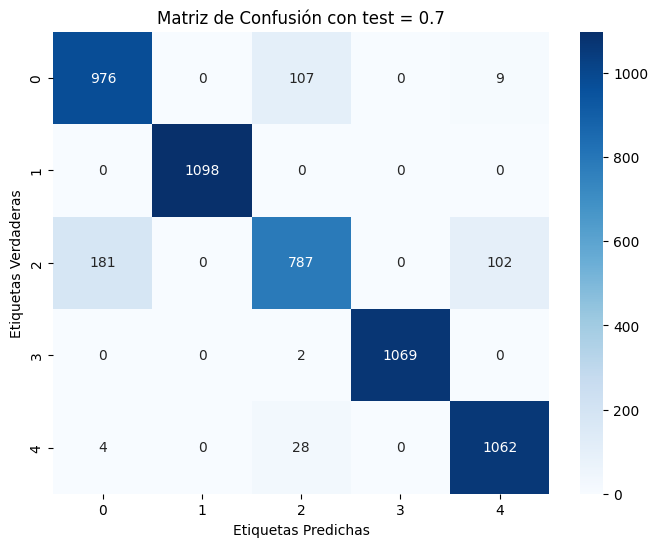

Exactitud del modelo: 0.920184331797235
Precisión del modelo: 0.9195987740495789
Recall del modelo: 0.920184331797235
Puntuación F1 del modelo: 0.9186587545925619
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.8.png


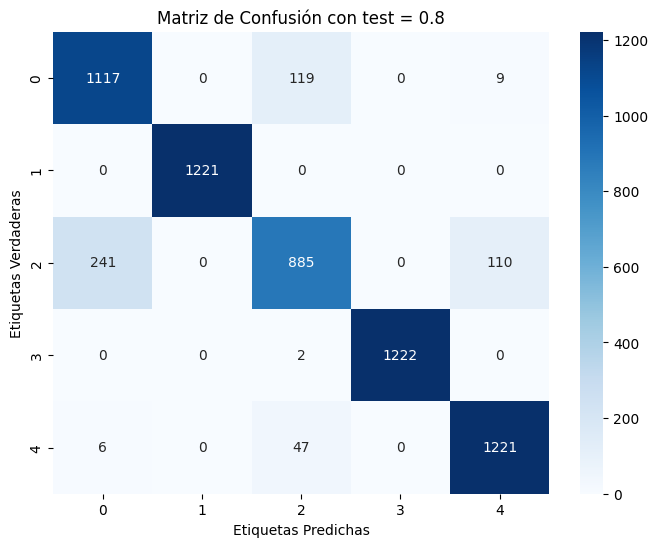

Exactitud del modelo: 0.9138709677419354
Precisión del modelo: 0.9135828601722377
Recall del modelo: 0.9138709677419354
Puntuación F1 del modelo: 0.9122542417153399
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.9.png


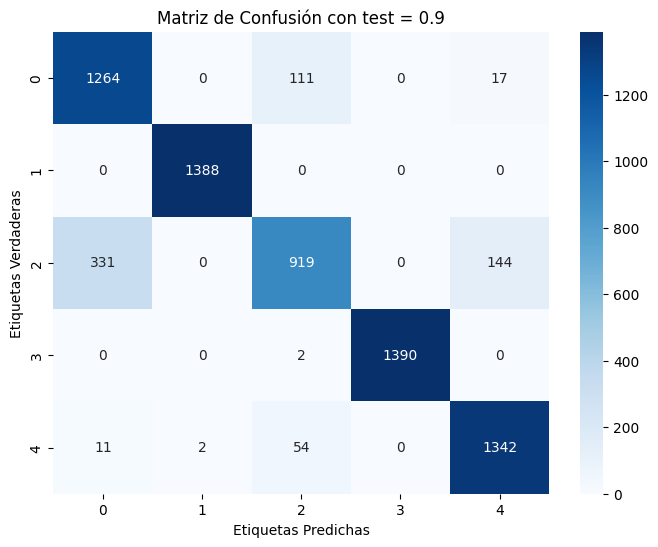

Exactitud del modelo: 0.9036559139784947
Precisión del modelo: 0.9048431368965809
Recall del modelo: 0.9036559139784947
Puntuación F1 del modelo: 0.9008728793407972
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_simple_13_vecinos/KNN_llava_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Se creó la carpeta KNN_llava_embeddings_val_cruz_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_2.png


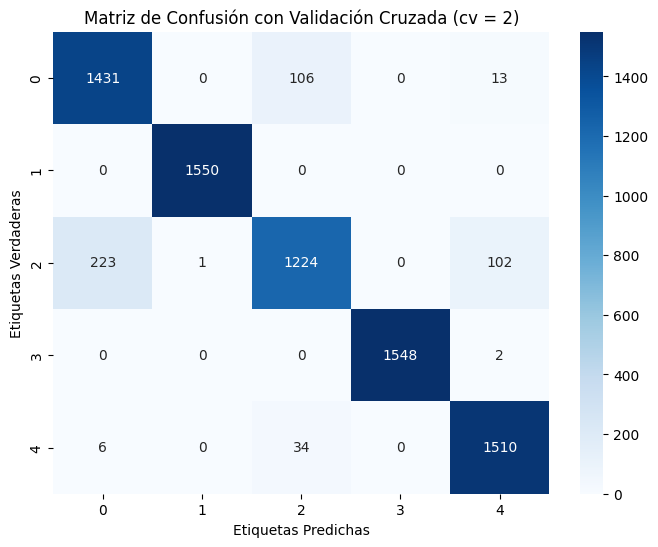

Exactitud media: 0.9371612903225807
Precisión media: 0.9373705315422801
Recall media: 0.9371612903225807
Puntuación F1 media: 0.9362570804011254
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_3.png


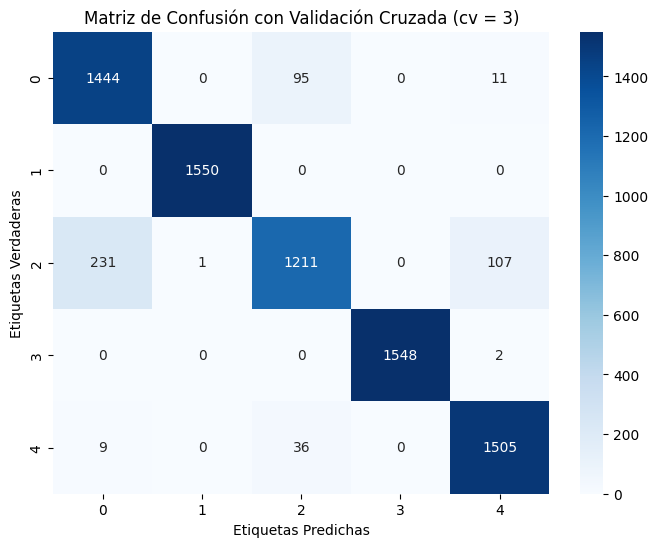

Exactitud media: 0.9365161290322581
Precisión media: 0.937075157369313
Recall media: 0.9365161290322581
Puntuación F1 media: 0.935511580546345
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_4.png


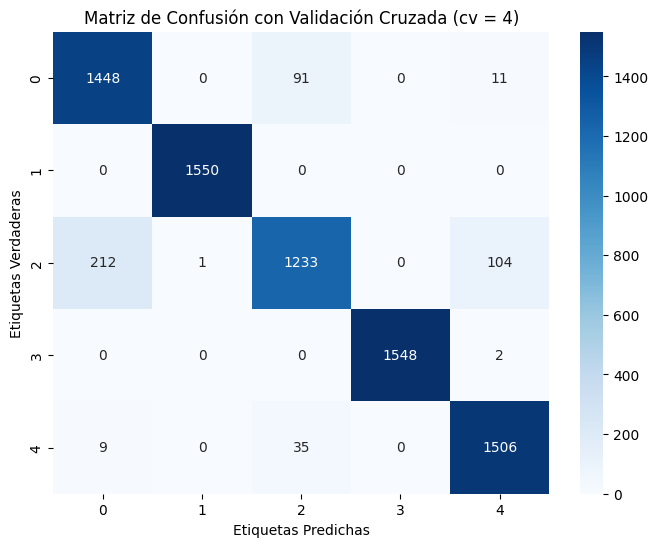

Exactitud media: 0.94
Precisión media: 0.9404273357539132
Recall media: 0.94
Puntuación F1 media: 0.9391327183206295
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_5.png


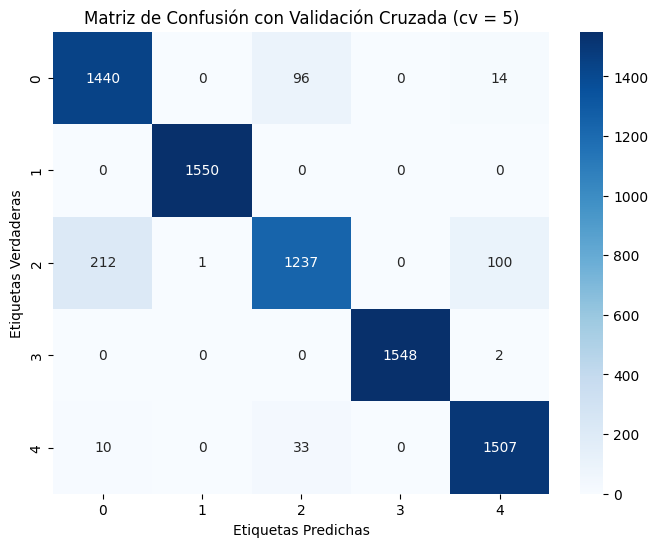

Exactitud media: 0.9396129032258065
Precisión media: 0.9399744710839864
Recall media: 0.9396129032258065
Puntuación F1 media: 0.9387963490840142
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_6.png


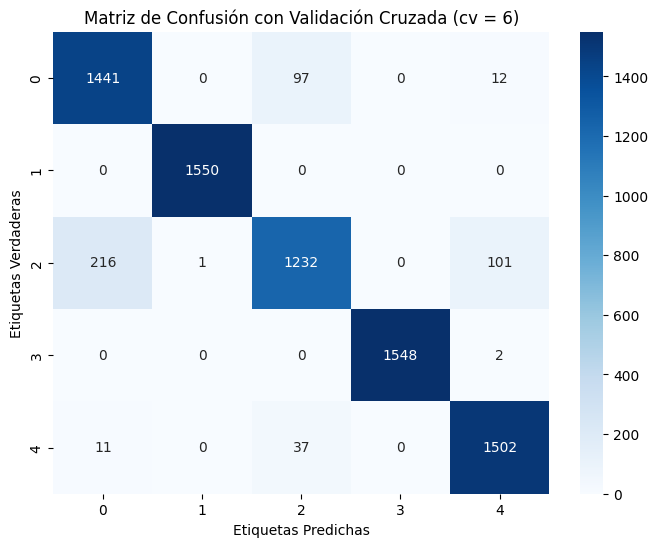

Exactitud media: 0.9384516129032258
Precisión media: 0.9388096276477558
Recall media: 0.9384516129032258
Puntuación F1 media: 0.9376288283392388
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_7.png


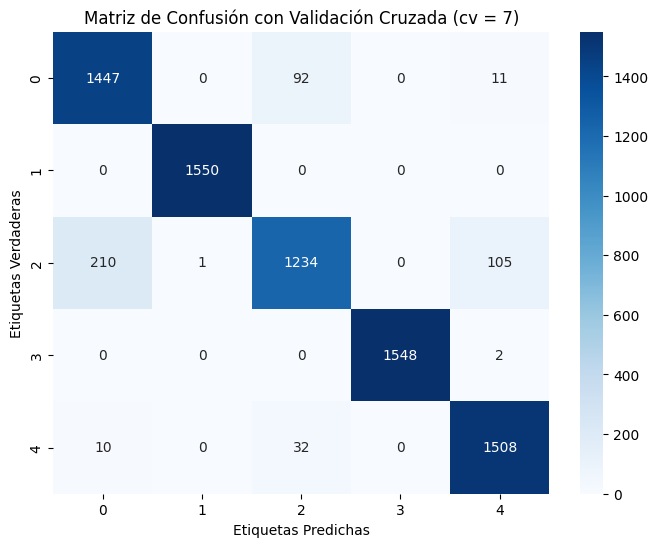

Exactitud media: 0.940258064516129
Precisión media: 0.9407000345167273
Recall media: 0.940258064516129
Puntuación F1 media: 0.9393886537210062
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_8.png


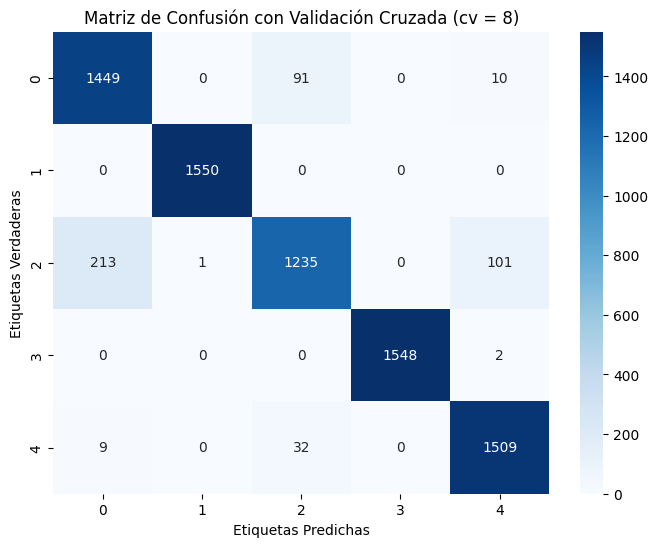

Exactitud media: 0.9407741935483871
Precisión media: 0.9412518449632105
Recall media: 0.9407741935483871
Puntuación F1 media: 0.9399167472587823
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_9.png


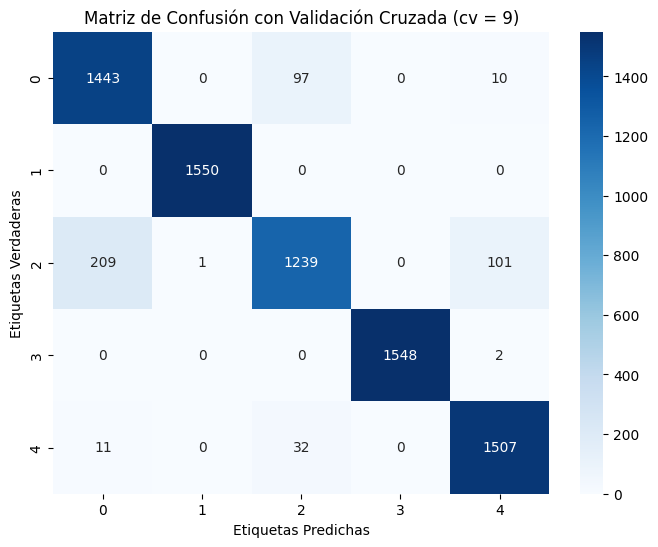

Exactitud media: 0.940258064516129
Precisión media: 0.940602576470396
Recall media: 0.940258064516129
Puntuación F1 media: 0.939451667013309
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
La carpeta KNN_llava_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llava
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_10.png


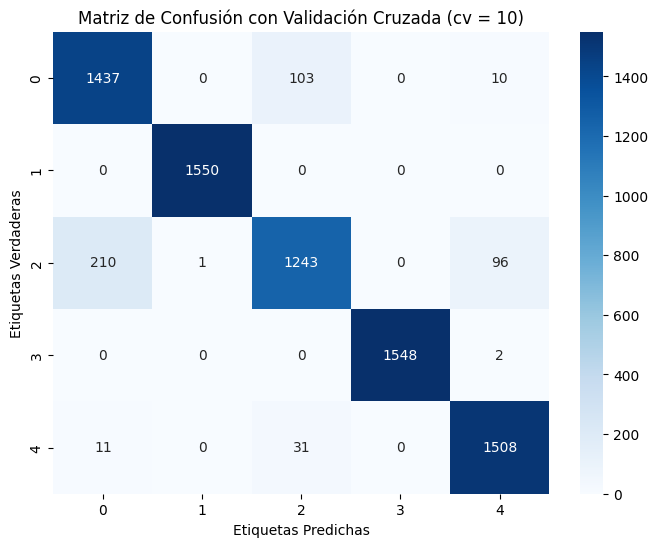

Exactitud media: 0.9401290322580645
Precisión media: 0.9403834895972447
Recall media: 0.9401290322580645
Puntuación F1 media: 0.9393745251562231
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llava/KNN_llava_embeddings_val_cruz_13_vecinos/KNN_llava_embeddings_val_cruz.json


In [5]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/KNN_llava_embeddings_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/KNN_llava_embeddings_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}


lista = [3,5,7,9,11,13]

for numero in lista: 
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = knn_classification(datos,numero,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = knn_classification(datos,numero,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)